# Classification models and cluster analyzes for the purchase intention of users of e-commerce platforms

Understanding how users' online activities influence their purchase likelihood is crucial for gaining insights into their motivations. Numerous studies in the academic space highlight the global expansion of the Internet contributing to the rise of e-commerce. Online stores are preferred over traditional brick-and-mortar establishments due to their enhanced accessibility, convenience, privacy, and extensive product variety (Schaupp and Belanger, 2005; Vijayasarathy, 2004; Jain et al., 2021; Rahayu et al., 2017)

__The main objectives of this project are:__

1.Explore novel classification models to predict purchase intentions.

2.Identify key factors within the best-performing model that significantly influence purchase intentions.

3.Group users into distinct categories based on their time spent on specific pages and exit rates.

The dataset used for this analysis is sourced from the Online Shoppers Purchasing Intention dataset provided by UC Irvine’s Machine Learning Repository. Each session in the dataset corresponds to a different user within a one-year period, ensuring diversity and avoiding bias towards specific campaigns, special days, user profiles, or seasons. The dataset comprises 18 features: 7 numerical and 11 categorical, and it includes a total of 12,330 entries.

The data set along with the introductory paper can be found here: https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset



**Column Descriptions:**

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. 

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: This variable represents the operating system that the user was on when viewing the page.

Browser: This variable represents the browser that the user was using to view the page.

Region: This variable represents which region the user is located in.

TrafficType: This variable represents what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase.


### Libraries Import

In [279]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

import sklearn 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, classification_report, accuracy_score, confusion_matrix, roc_curve, auc, recall_score, precision_score, f1_score
from sklearn.cluster import KMeans




### Exploratory Data Analysis

In [280]:
data = pd.read_csv("online_shoppers_intention.csv")
data.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [281]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [282]:
# Missing / Null values
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [283]:
#Unique values for each column
data.nunique(axis=0)

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [284]:
# Create a copy of the data set in order to work with it and keep the original data set unmodified
data_copy = data.copy()

In [285]:
# Checking the type of variables
data_copy.dtypes


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [286]:
# I notice that some categorial variables are encoded as numerical ones (float64 or int64). 
data_copy['Administrative'] = data_copy['Administrative'].astype('category')
data_copy['Informational'] = data_copy['Informational'].astype('category')
data_copy['Browser'] = data_copy['Browser'].astype('category')
data_copy['Region'] = data_copy['Region'].astype('category')
data_copy['OperatingSystems'] = data_copy['OperatingSystems'].astype('category')
data_copy['TrafficType'] = data_copy['TrafficType'].astype('category')

In [287]:
# Checking once again the type 
data_copy.dtypes

Administrative             category
Administrative_Duration     float64
Informational              category
Informational_Duration      float64
ProductRelated                int64
ProductRelated_Duration     float64
BounceRates                 float64
ExitRates                   float64
PageValues                  float64
SpecialDay                  float64
Month                        object
OperatingSystems           category
Browser                    category
Region                     category
TrafficType                category
VisitorType                  object
Weekend                        bool
Revenue                        bool
dtype: object

In [288]:
# Make all column names have lower case
data_copy.columns = data_copy.columns.str.lower()

#### Univariate Analysis

##### Categorial variables

In [289]:
# Descriptive statistics on the categorial variables
data_copy.describe(include=['category', 'bool','object'])

,administrative,informational,month,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
count,12330,12330,12330,12330,12330,12330,12330,12330,12330,12330
unique,27,17,10,8,13,9,20,3,2,2
top,0,0,May,2,2,1,2,Returning_Visitor,False,False
freq,5768,9699,3364,6601,7961,4780,3913,10551,9462,10422


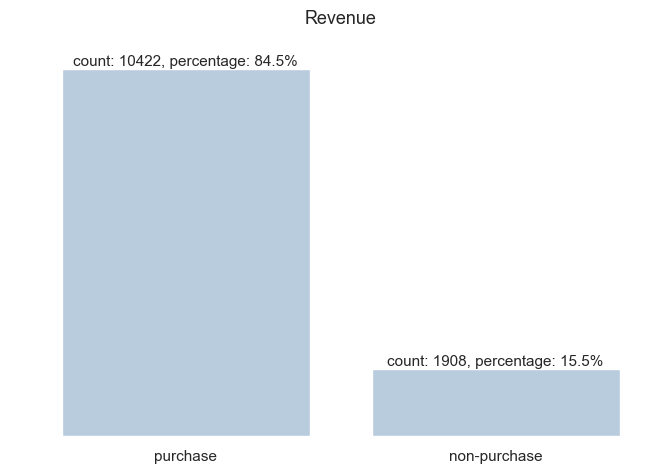

In [290]:
# Revenue

counts = data_copy['revenue'].value_counts()
percentage = (counts / len(data)) * 100

summary = pd.DataFrame({
    'revenue': counts.index,
    'counts': counts.values,
    'percentage': percentage.values
})

sns.set_theme(style='white')
sns.set_palette("Pastel1")

plt.figure(figsize=(8, 5))
sns.barplot(x='revenue', y='counts', data=summary, width=0.8)

for i, v in enumerate(summary['counts']):
    plt.text(i, v + 100, f'count: {v}, percentage: {summary["percentage"][i]:.1f}%', ha='center', fontsize=11)

ax = sns.countplot(x='revenue', data=data_copy)
ax.xaxis.set_major_locator(FixedLocator([0, 1]))
ax.xaxis.set_major_formatter(FixedFormatter(['purchase', 'non-purchase']))

plt.title('Revenue', y=1.05, fontsize=13)
plt.ylabel(" ")
plt.yticks([])
plt.xlabel('')
sns.despine(left=True, bottom=True)
plt.show()

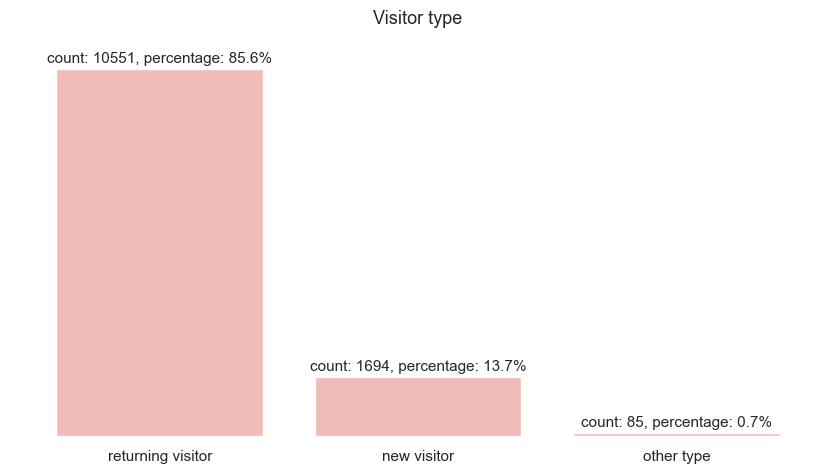

In [291]:
# Variabila 'Visitor Type'

counts = data_copy['visitortype'].value_counts()
percentage = (counts / len(data)) *100

summary = pd.DataFrame({
    'visitortype': counts.index,
    'counts': counts.values,
    'percentage': percentage.values
})


# Replace values with desired labels
summary['visitortype'].replace({
    'Returning_Visitor': 'returning visitor',
    'New_Visitor': 'new visitor',
    'Other': 'other type'
}, inplace=True)


sns.set_theme(style='white')
sns.set_palette('Pastel1')
plt.figure(figsize=(10, 5))

sns.barplot(x='visitortype', y='counts', data=summary, width=0.8)

for i, v in enumerate(summary['counts']):
    plt.text(i, v + 200, f'count: {v}, percentage: {summary["percentage"][i]:.1f}%', ha='center', fontsize=11)
    

plt.title('Visitor type', y=1.05, fontsize=13)
plt.ylabel(" ")
plt.yticks([])
plt.xlabel('')
plt.xticks(range(len(summary)), summary['visitortype'].values)
sns.despine(left=True, bottom=True)

plt.show()


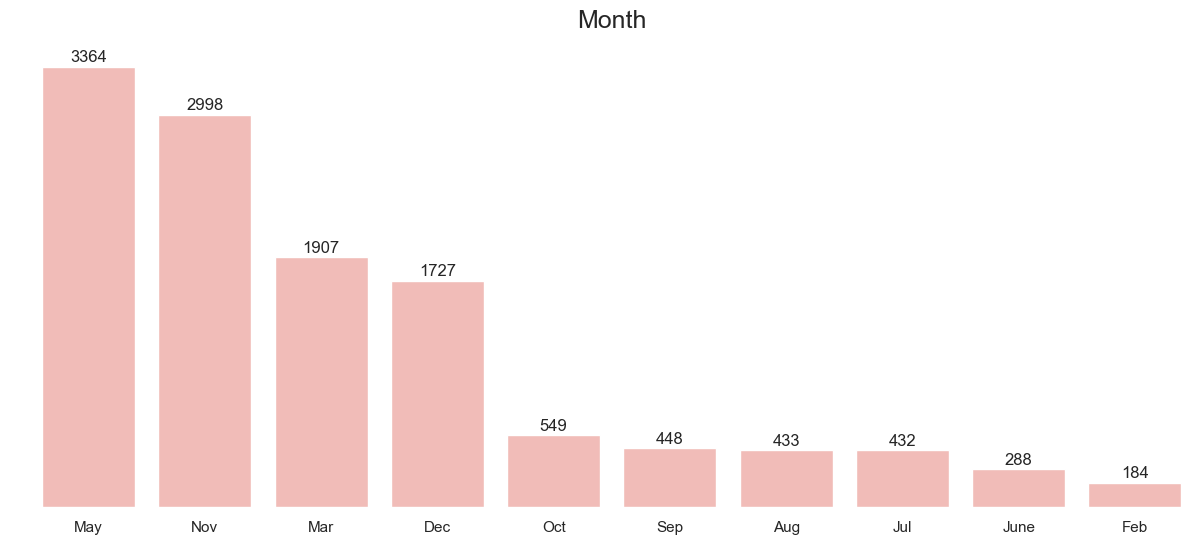

In [292]:
# Month

counts = data_copy['month'].value_counts()


summary = pd.DataFrame({
    'month': counts.index,
    'counts': counts.values
})

sns.set_theme(style='white')
sns.set_palette('Pastel1', 10)
plt.figure(figsize=(15, 6))

sns.barplot(x='month', y='counts', data=summary, width=0.8)

for i, v in enumerate(summary['counts']):
    plt.text(i, v + 40, f'{v}', ha='center')


plt.title('Month', y=1.02, ha='center', fontsize=18)
plt.ylabel(" ")
plt.yticks([])
plt.xlabel('')

sns.despine(left=True, bottom=True)

plt.show()


In [293]:
# Drop the 'month' variable
data_copy.drop(columns='month', inplace=True)

In [294]:
# Special Day

# I have kept the 'specialday' variable as a numeric one as I want to make some adjustments to it for easier analysis. 
# For values > 0.4, I'll consider that the day is special and for values <= 0.4, I'll consider that the day is not special. 
# Given this, I'll transform afterwards the variable into a boolean one. 

data_copy.loc[data_copy['specialday'] > 0.4, 'specialday']=1
data_copy.loc[data_copy['specialday'] <= 0.4, 'specialday'] = 0

# Transform "specialday" into a boolean variable
data_copy['specialday'] = data_copy['specialday'].astype('bool')
data_copy['specialday'].value_counts()


specialday
False    11500
True       830
Name: count, dtype: int64

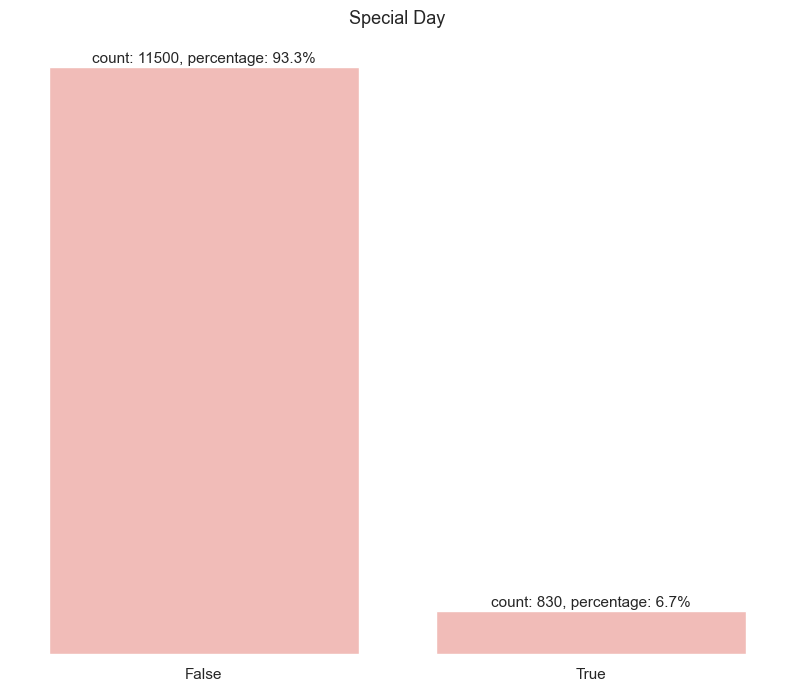

In [295]:
counts = data_copy['specialday'].value_counts()
percentage = (counts / len(data_copy)) * 100

summary = pd.DataFrame({
    'specialday': counts.index,
    'counts': counts.values,
    'percentage': percentage.values
})

sns.set_theme(style='white')
sns.set_palette('Pastel1')
plt.figure(figsize=(10, 8))

sns.barplot(x= 'specialday', y='counts', data=summary, width=0.8)

for i, v in enumerate(summary['counts']):
    plt.text(i, v + 100, f'count: {v}, percentage: {summary["percentage"][i]:.1f}%', ha='center', fontsize=11)


plt.title('Special Day', y=1.01, fontsize=13)
plt.ylabel("")
plt.yticks([])
plt.xlabel('')

sns.despine(bottom=True, left=True)

plt.show()

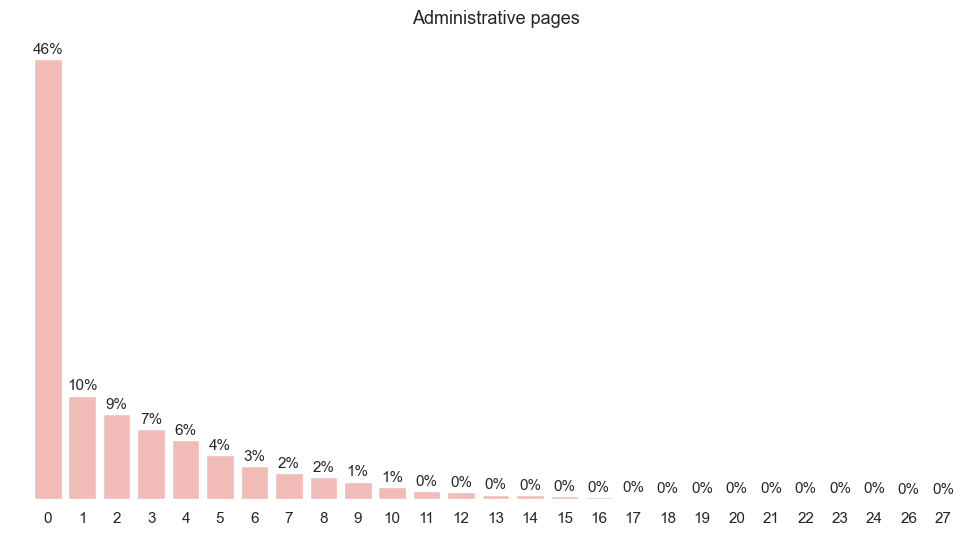

In [296]:
# Administrative pages

counts = data_copy['administrative'].value_counts()
percentage = (counts / len(data)) *100

summary = pd.DataFrame({
    'administrative': counts.index,
    'counts': counts.values,
    'percentage': percentage.values
})
sns.set_theme(style='white')
sns.set_palette('Pastel1')
plt.figure(figsize=(12, 6))

sns.barplot(x='administrative', y='counts', data=summary)

for i, v in enumerate(summary['counts']):
    plt.text(i, v + 70, f'{int(summary["percentage"][i])}%', ha='center', fontsize=11)

plt.title('Administrative pages', y=1.01, fontsize=13)
plt.ylabel(" ")
plt.yticks([])
plt.xlabel('')

sns.despine(bottom=True, left=True)

plt.show()

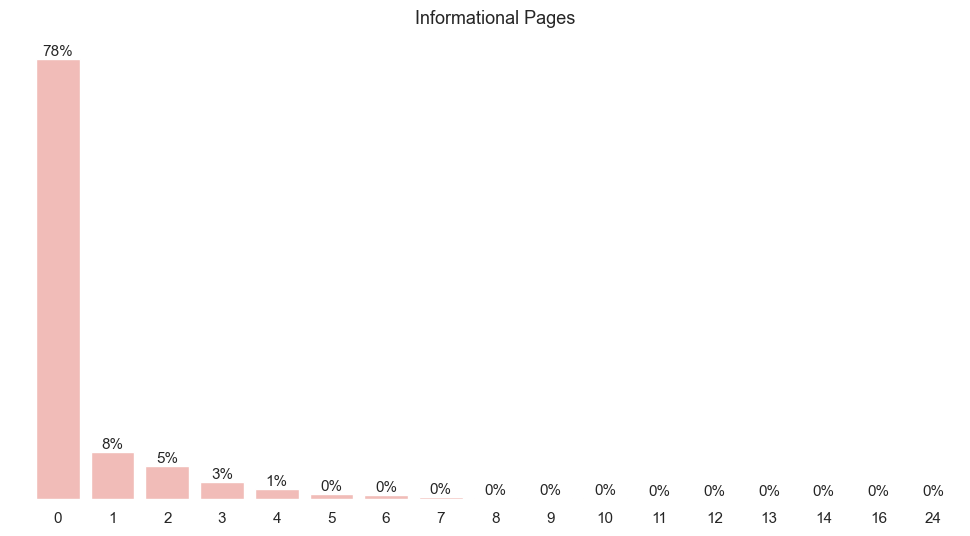

In [297]:
# Informational pages

counts = data_copy['informational'].value_counts()
percentage = (counts / len(data)) *100

summary = pd.DataFrame({
    'informational': counts.index,
    'counts': counts.values,
    'percentage': percentage.values
})
sns.set_theme(style='white')
sns.set_palette('Pastel1')
plt.figure(figsize=(12, 6))

sns.barplot(x='informational', y='counts', data=summary)

for i, v in enumerate(summary['counts']):
    plt.text(i, v + 70, f'{int(summary["percentage"][i])}%', ha='center', fontsize=11)

plt.title('Informational Pages', y=1.01, fontsize=13)
plt.ylabel(" ")
plt.yticks([])
plt.xlabel('')

sns.despine(bottom=True, left=True)

plt.show()

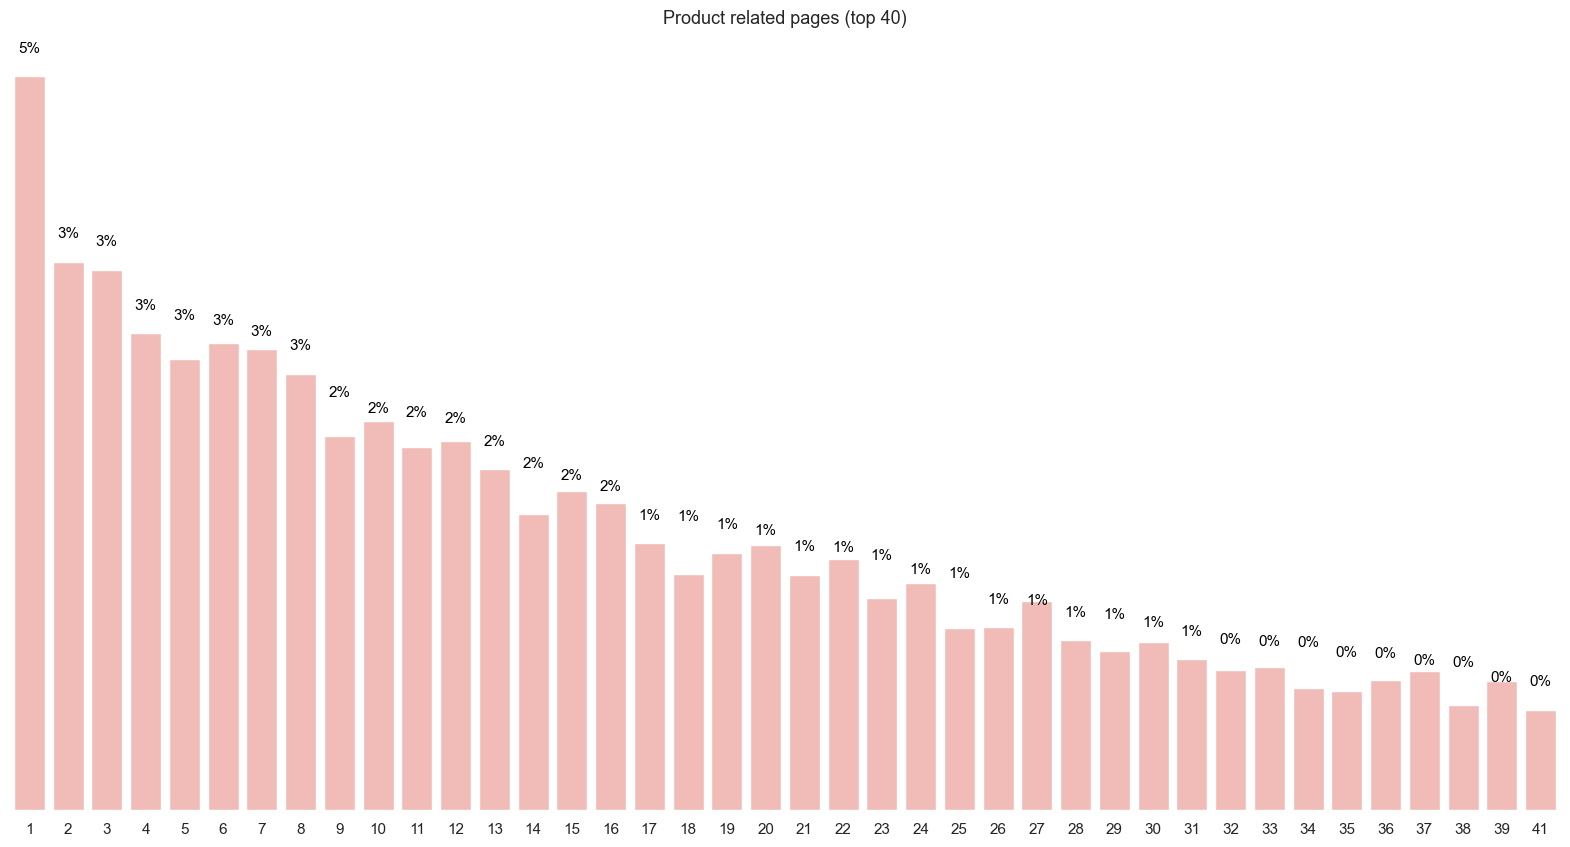

In [298]:
# Product related pages

counts = data_copy['productrelated'].value_counts()
percentage = (counts / len(data_copy)) * 100

summary = pd.DataFrame({
    'productrelated': counts.index,
    'counts': counts.values,
    'percentage': percentage.values
})

summary = summary.sort_values(by='counts', ascending=False)

# There are 300+ product related pages, hence I chose to display only the first 40 pages in the plot to make sure it has a clear look
summary_top40 = summary.head(40)

sns.set_theme(style='white')
sns.set_palette('Pastel1')
plt.figure(figsize=(20, 10))

ax = sns.barplot(x='productrelated', y='counts', data=summary_top40)

for i, v in enumerate(summary_top40['counts']):
    ax.text(i, v + 20, f'{int(summary_top40["percentage"][i])}%', ha='center', fontsize=11, color='black')

plt.title('Product related pages (top 40)', y=1.01, fontsize=13)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')

sns.despine(bottom=True, left=True)

plt.show()

In [299]:
# The 'productrelated' variable was kept as int in order to be able to create the plot above, but the variable itself is a categorial one
# (specifically, an ordinal one), so I will modify the type accordingly

data_copy['productrelated'] = data_copy['productrelated'].astype('category')

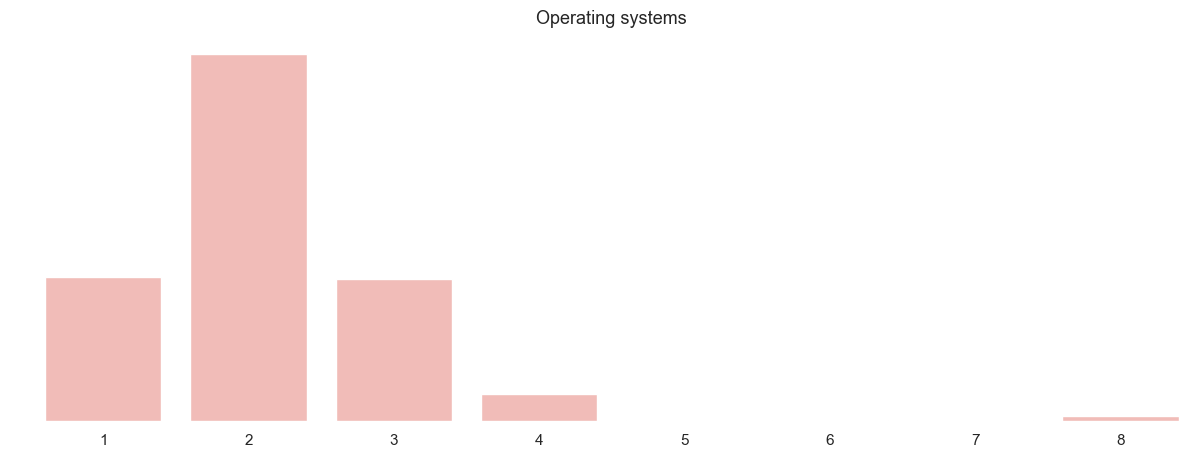

In [300]:
# Operating Systems

counts = data_copy['operatingsystems'].value_counts()

summary = pd.DataFrame({
    'operatingsystems': counts.index,
    'counts': counts.values,
})

sns.set_theme(style='white')
sns.set_palette('Pastel1')
plt.figure(figsize=(15, 5))

sns.barplot(x='operatingsystems', y='counts', data=summary)

plt.title('Operating systems', y=1.01, fontsize=13)
plt.ylabel(" ")
plt.yticks([])
plt.xlabel('')

sns.despine(bottom=True, left=True)

plt.show()

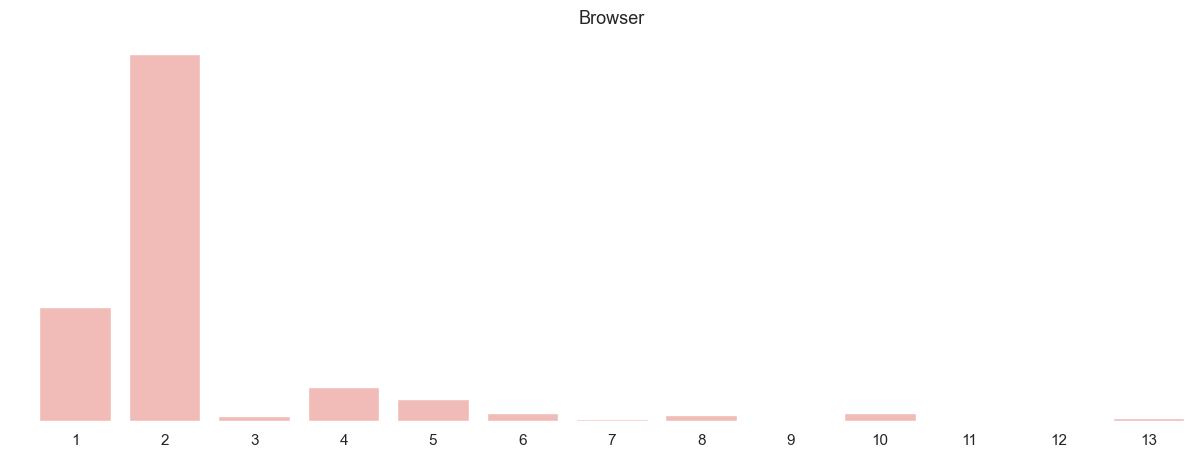

In [301]:
# Browser

counts = data_copy['browser'].value_counts()

summary = pd.DataFrame({
    'browser': counts.index,
    'counts': counts.values,
})

sns.set_theme(style='white')
sns.set_palette('Pastel1')
plt.figure(figsize=(15, 5))

sns.barplot(x='browser', y='counts', data=summary)

plt.title('Browser', y=1.01, fontsize=13)
plt.ylabel(" ")
plt.yticks([])
plt.xlabel('')

sns.despine(bottom=True, left=True)

plt.show()

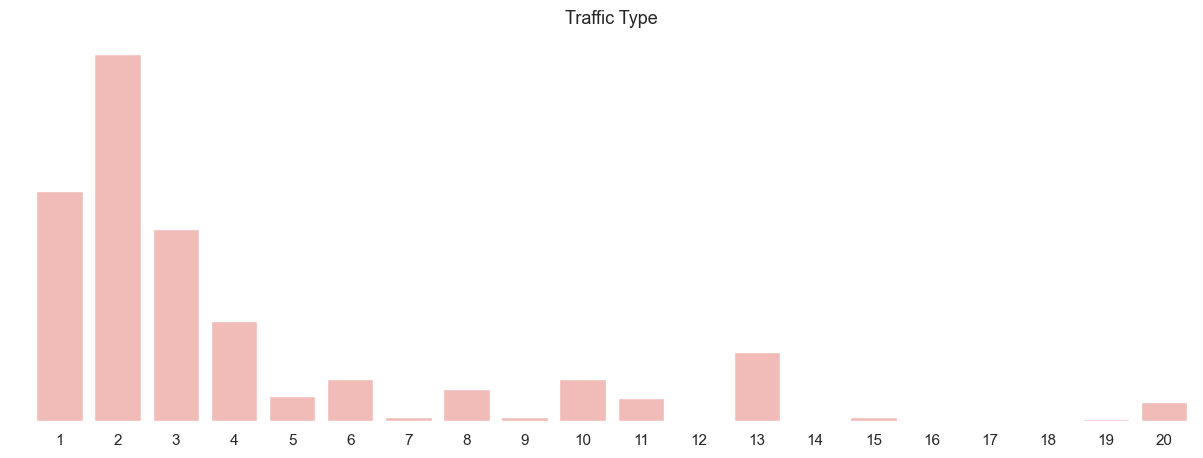

In [302]:
# Traffic Type

counts = data_copy['traffictype'].value_counts()

summary = pd.DataFrame({
    'traffictype': counts.index,
    'counts': counts.values,
})

sns.set_theme(style='white')
sns.set_palette('Pastel1')
plt.figure(figsize=(15, 5))

sns.barplot(x='traffictype', y='counts', data=summary)

plt.title('Traffic Type', y=1.01, fontsize=13)
plt.ylabel(" ")
plt.yticks([])
plt.xlabel('')

sns.despine(bottom=True, left=True)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

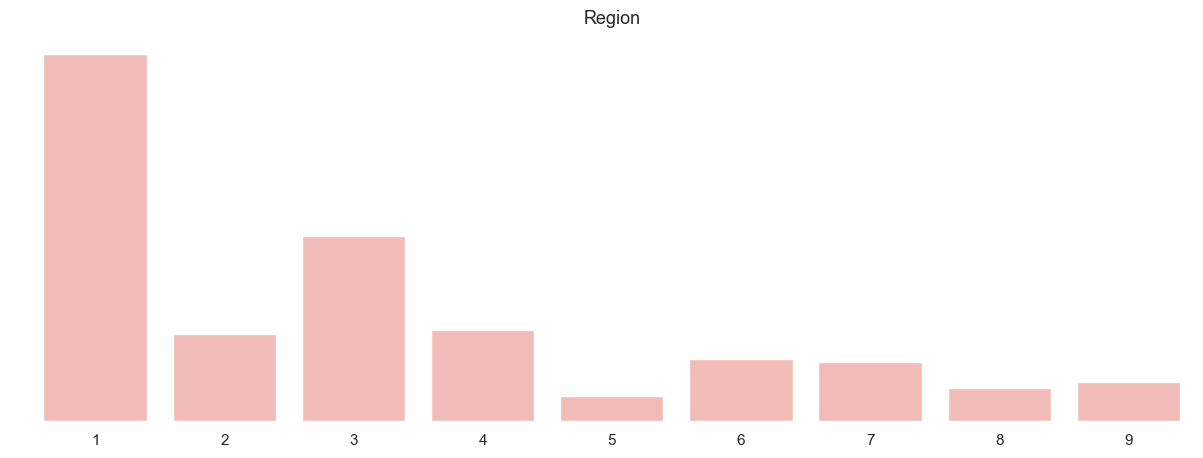

In [303]:
# Region

counts = data_copy['region'].value_counts()

summary = pd.DataFrame({
    'region': counts.index,
    'counts': counts.values,
})

sns.set_theme(style='white')
sns.set_palette('Pastel1')
plt.figure(figsize=(15, 5))

sns.barplot(x='region', y='counts', data=summary)

plt.title('Region', y=1.01, fontsize=13)
plt.ylabel(" ")
plt.yticks([])
plt.xlabel('')

sns.despine(bottom=True, left=True)

plt.show

##### General insights on the categorical variables:
The variable "month" includes only 10 unique values, with two months having no entries. The highest number of visits is recorded in May, while February has the fewest. Consequently, I decided to drop this variable as it does not represent visits over a full year, and temporal sensitivity will be explored through the "specialday" and "weekend" variables. Among all accesses, only 6.7% occurred on special days (e.g., Valentine's Day, Mother's Day, etc.), and 23.3% on weekends. Regarding the "purchase" variable, only 15.5% of total users completed a transaction, while approximately 85% did not make a purchase. Additionally, returning users account for the majority, representing about 86% of total users. The most common values for the variables "operatingsystem," "browser," and "traffictype" are 2, and for "region," it is 1. Their distributions are skewed, and without a legend providing explanations for these values, it is challenging to offer insights into, for instance, the popularity of specific operating systems among e-commerce users.



#### Numeric variables

In [304]:
# Descriptive statistics 
data_copy.describe(include = ['float64'])

,administrative_duration,informational_duration,productrelated_duration,bouncerates,exitrates,pagevalues
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,80.818611,34.472398,1194.746220,0.022191,0.043073,5.889258
std,176.779107,140.749294,1913.669288,0.048488,0.048597,18.568437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,184.137500,0.000000,0.014286,0.000000
50%,7.500000,0.000000,598.936905,0.003112,0.025156,0.000000
75%,93.256250,0.000000,1464.157214,0.016813,0.050000,0.000000
max,3398.750000,2549.375000,63973.522230,0.200000,0.200000,361.763742


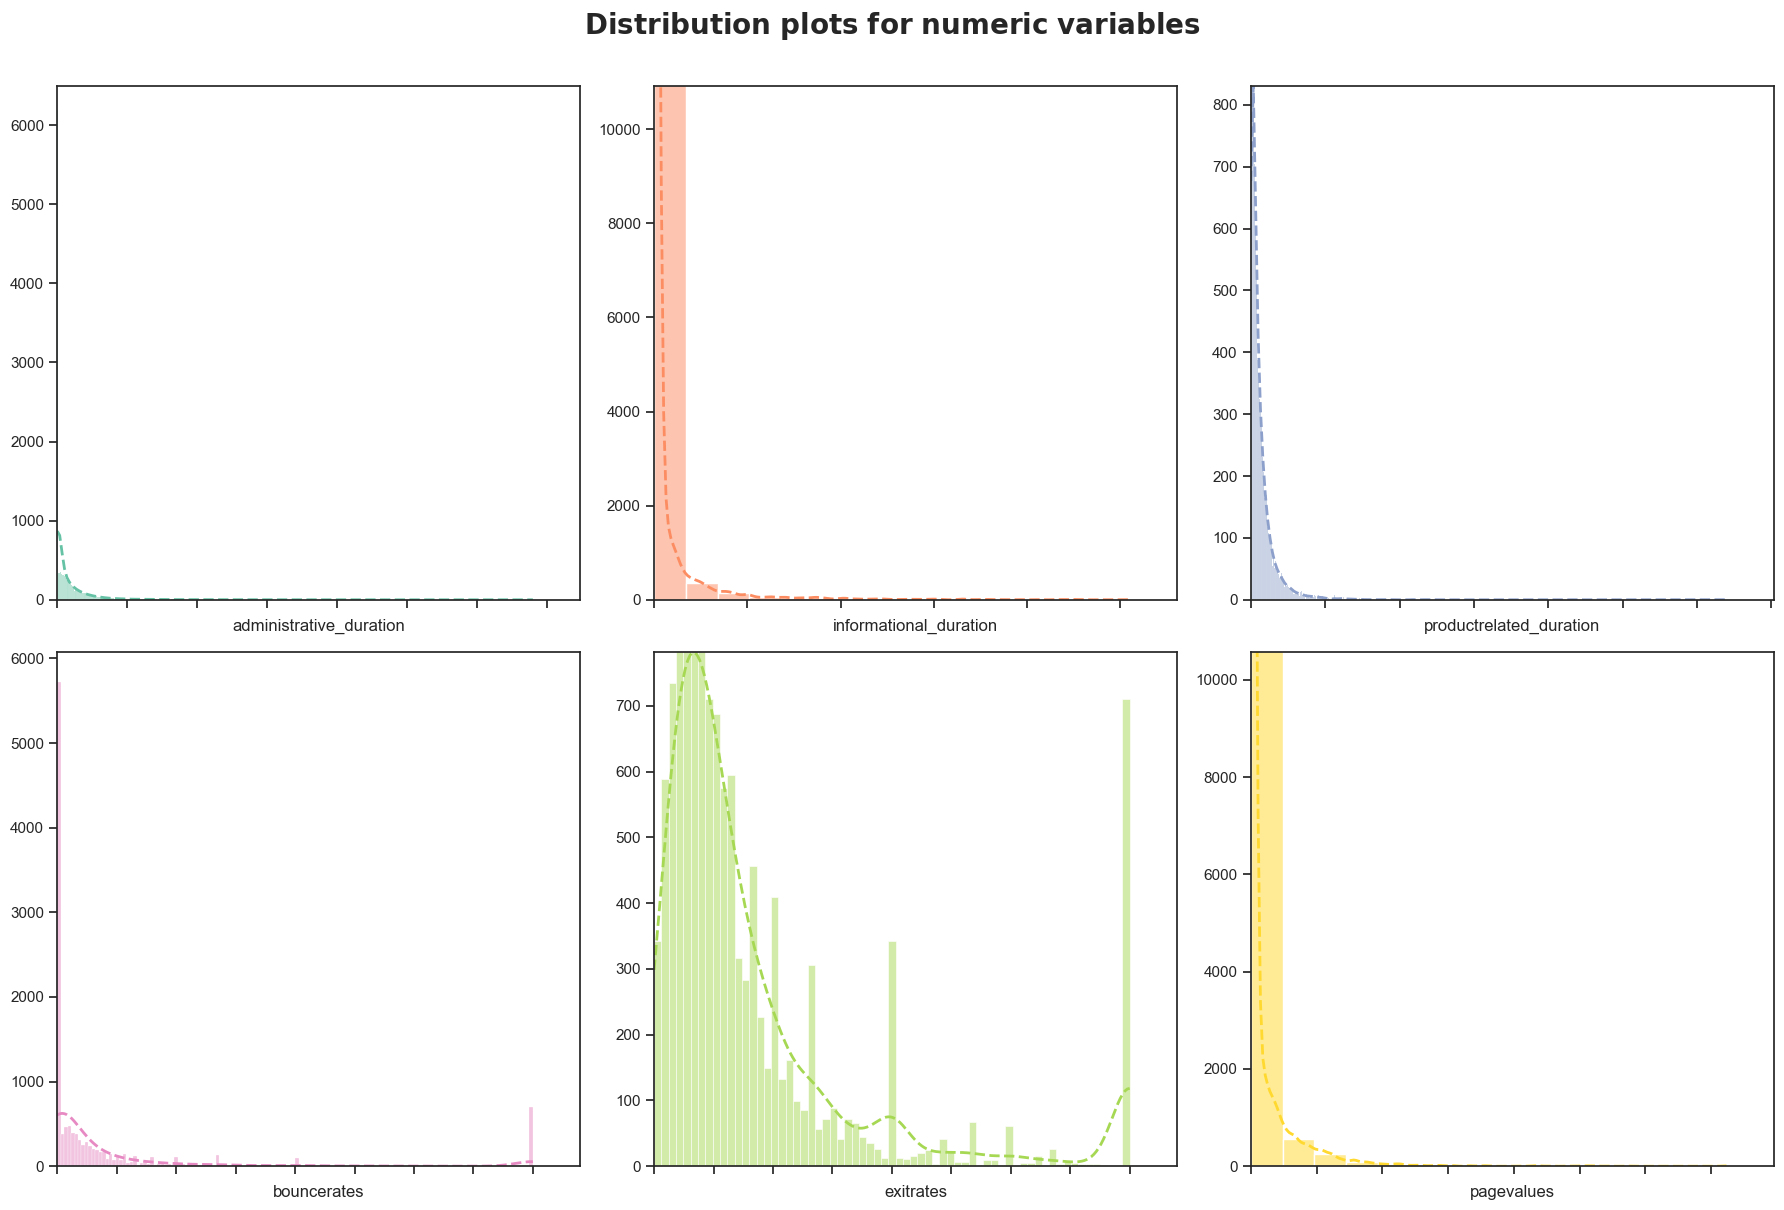

In [305]:
# Distribution plots 

var_num = ['administrative_duration',
            'informational_duration',
            'productrelated_duration',
            'bouncerates',
            'exitrates',
            'pagevalues']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18,12))
axs = axs.flatten()

palette = sns.color_palette("Set2", 6)

for i, col in enumerate(var_num):
    sns.histplot(data=data_copy, x=col, kde=True, line_kws={'lw':2, 'ls':'--'}, color=palette[i], ax=axs[i])
    axs[i].set_xlim(data_copy[col].min()*0.9, data_copy[col].max()*1.1)
    axs[i].set_ylim(0, data_copy[col].value_counts().max()*1.1)
    axs[i].set_ylabel('')

plt.suptitle(r"$\bf{Distribution\ plots\ for\ numeric\ variables}$", fontsize=20, va='bottom')

for ax in axs.flat:
  
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

for ax in axs.flat:
 ax.set_xticklabels([])

plt.tight_layout()
plt.show()


In [306]:
# Skewness & kurtosis

float_cols = data_copy.select_dtypes(include=[np.float64])

skewness_value = float_cols.skew()
kurtosis_value = float_cols.kurtosis()

skewness_table = pd.DataFrame({'Columns': skewness_value.index, 'Skewness': skewness_value.values})
skewness_table.set_index('Columns', inplace=True)
kurtosis_table = pd.DataFrame({'Columns': kurtosis_value.index, 'Kurtosis': kurtosis_value.values})
kurtosis_table.set_index('Columns', inplace=True)

distr_shape_table = pd.concat([skewness_table, kurtosis_table], axis=1)

distr_shape_table

,Skewness,Kurtosis
Columns,,
administrative_duration,5.615719,50.556739
informational_duration,7.579185,76.316853
productrelated_duration,7.263228,137.174164
bouncerates,2.947855,7.723159
exitrates,2.148789,4.017035
pagevalues,6.382964,65.635694


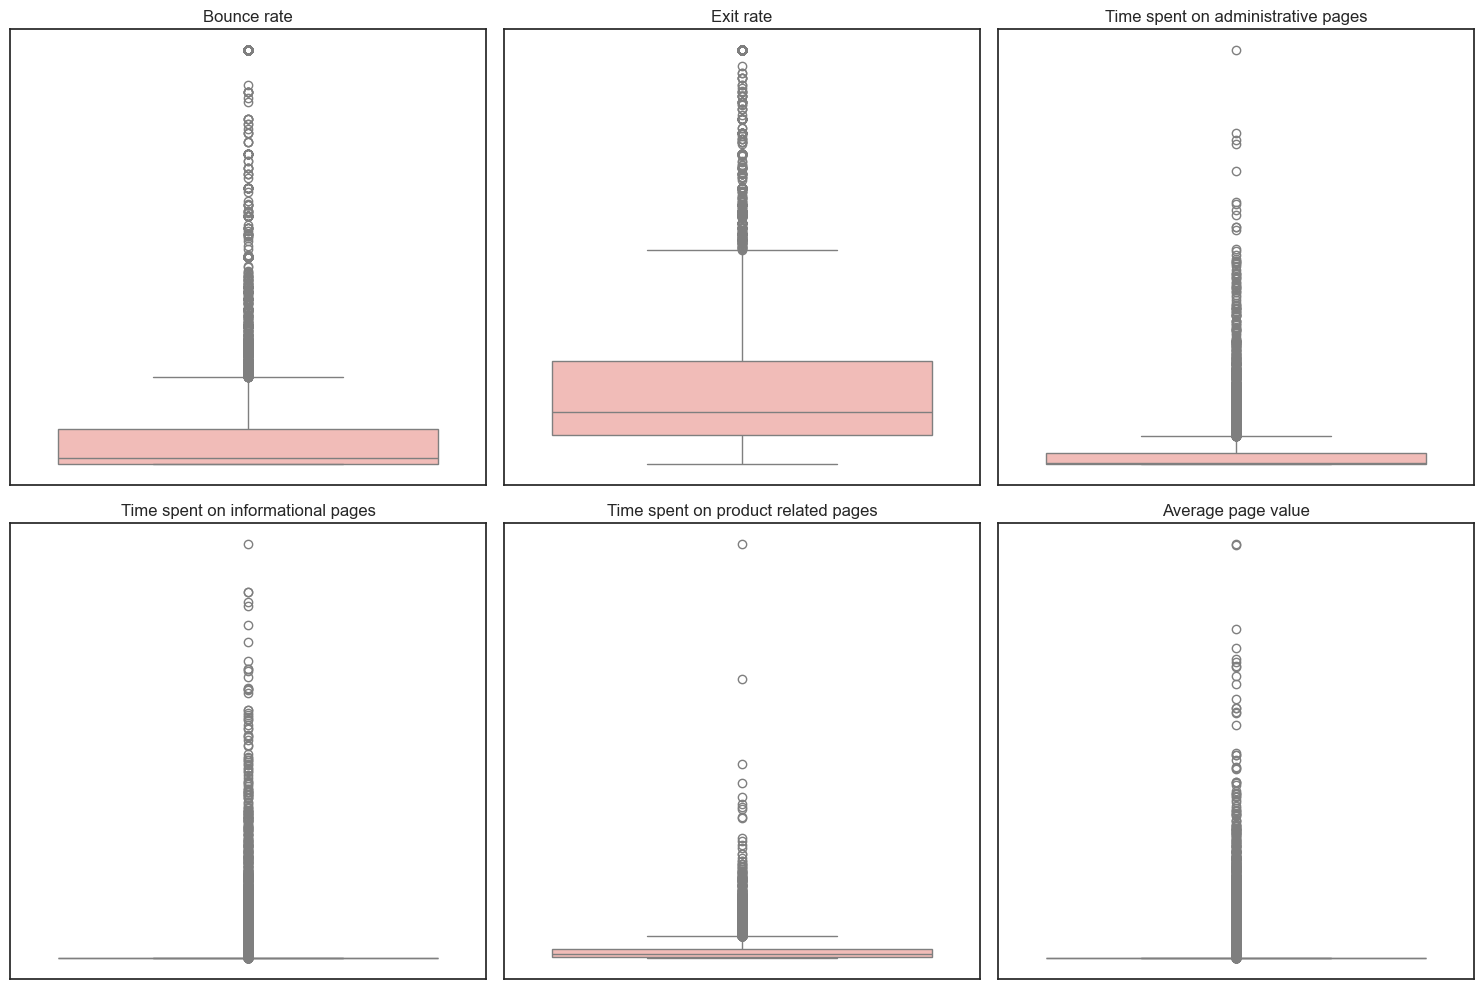

In [307]:
# Chekcing outliers

plt.figure(figsize = (15, 15))  
sns.set_style('white')
sns.set_palette('Pastel1')

ax1 = plt.subplot(331)
sns.boxplot(y=data_copy['bouncerates'])
ax1.set_title('Bounce rate')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel("")

ax2 = plt.subplot(332)
sns.boxplot(y=data_copy['exitrates'])
ax2.set_title('Exit rate')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylabel("")

ax3 = plt.subplot(333)
sns.boxplot(y=data_copy['administrative_duration'])
ax3.set_title('Time spent on administrative pages')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_ylabel("")

ax4 = plt.subplot(334)
sns.boxplot(y=data_copy['informational_duration'])
ax4.set_title('Time spent on informational pages')
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_ylabel("")

ax5 = plt.subplot(335)
sns.boxplot(y=data_copy['productrelated_duration'])
ax5.set_title('Time spent on product related pages')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_ylabel("")

ax6 = plt.subplot(336)
sns.boxplot(y=data_copy['pagevalues'])
ax6.set_title('Average page value')
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_ylabel("")

plt.tight_layout()  
plt.show() 


In [308]:
# If I remove the outliers from 'informational_duration' & 'pagevalues', I'll be left with 0 values. So, I'll remove the
# outliers from the other variables using the IQR method.

numerical_features=['bouncerates','exitrates','administrative_duration','productrelated_duration']
for cols in numerical_features:
    Q1 = data_copy[cols].quantile(0.25)
    Q3 = data_copy[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (data_copy[cols] >= Q1 - 1.5 * IQR) & (data_copy[cols] <= Q3 + 1.5 *IQR)
    data_copy = data_copy.loc[filter]
    



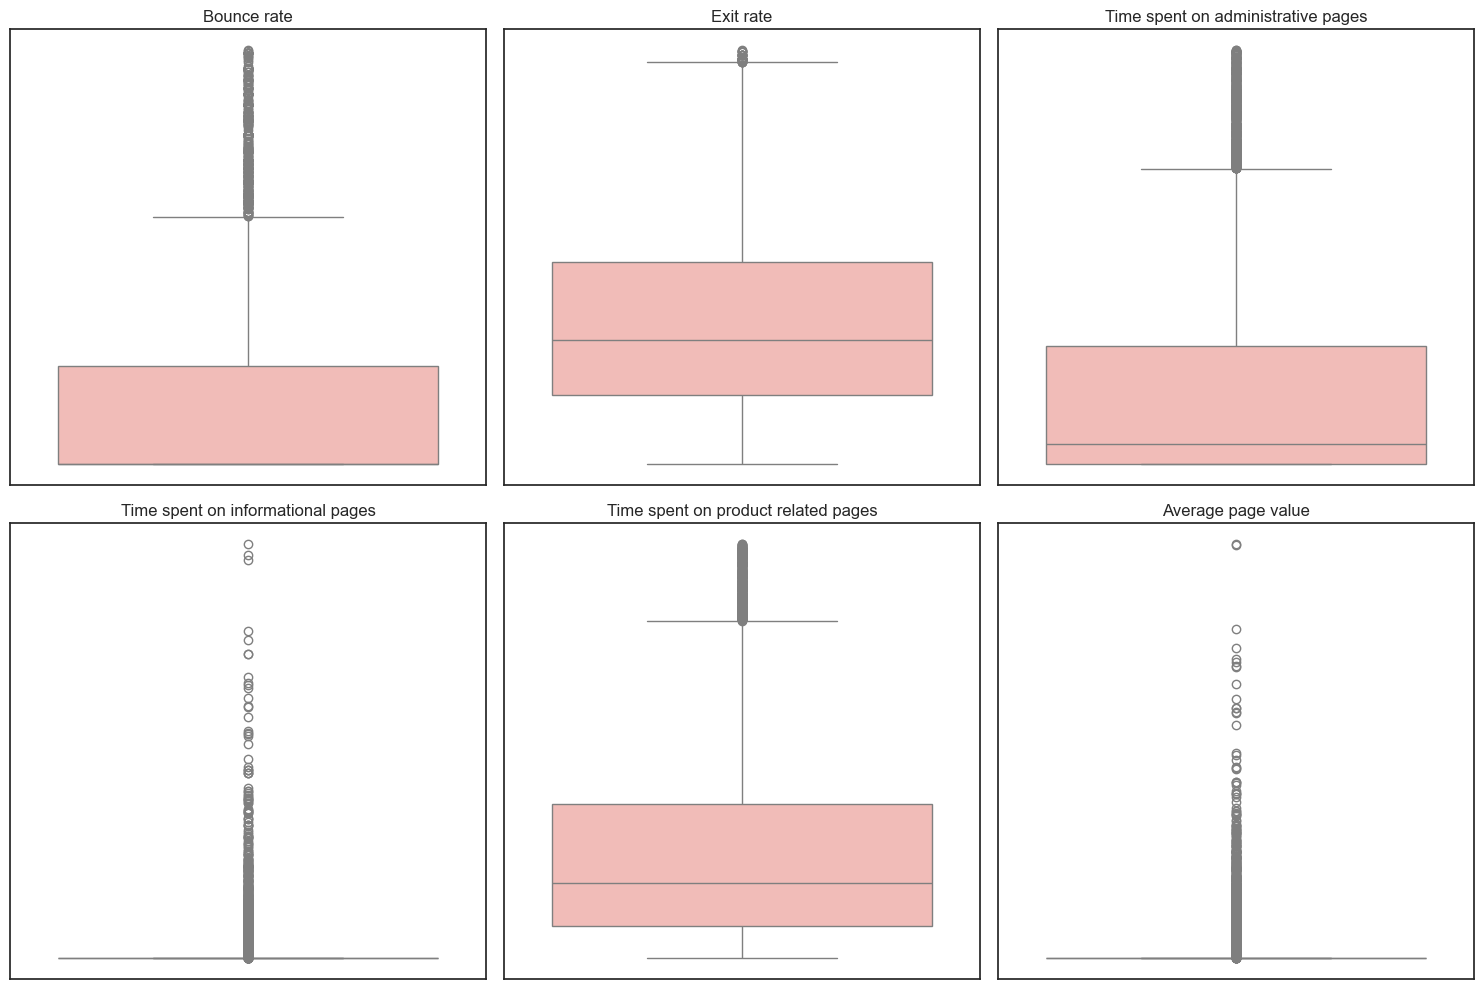

In [309]:
# Checking the outliers again

plt.figure(figsize = (15, 15))  
sns.set_style('white')
sns.set_palette('Pastel1')

ax1 = plt.subplot(331)
sns.boxplot(y=data_copy['bouncerates'])
ax1.set_title('Bounce rate')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel("")

ax2 = plt.subplot(332)
sns.boxplot(y=data_copy['exitrates'])
ax2.set_title('Exit rate')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_ylabel("")

ax3 = plt.subplot(333)
sns.boxplot(y=data_copy['administrative_duration'])
ax3.set_title('Time spent on administrative pages')
ax3.set_xticks([])
ax3.set_yticks([])
ax3.set_ylabel("")

ax4 = plt.subplot(334)
sns.boxplot(y=data_copy['informational_duration'])
ax4.set_title('Time spent on informational pages')
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_ylabel("")

ax5 = plt.subplot(335)
sns.boxplot(y=data_copy['productrelated_duration'])
ax5.set_title('Time spent on product related pages')
ax5.set_xticks([])
ax5.set_yticks([])
ax5.set_ylabel("")

ax6 = plt.subplot(336)
sns.boxplot(y=data_copy['pagevalues'])
ax6.set_title('Average page value')
ax6.set_xticks([])
ax6.set_yticks([])
ax6.set_ylabel("")

plt.tight_layout()  
plt.show() 

##### General insights on the numeric variables:
The distributions of each variable are highly skewed, primarily positively skewed (skewness > 0). Consequently, a significant proportion of users spend minimal time on pages containing administrative, informational, and product-related content. Additionally, users often exit pages shortly after visiting without further engagement ("bouncerates"), and many abandon the website immediately after navigating to the second page ("exitrates").
Due to the pronounced skewness in the numeric variable distributions, the likelihood of encountering numerous extreme values is substantially increased. To mitigate the impact of outliers, I employed the Interquartile Range (IQR) method, which is robust and not influenced by the mean (e.g., "bouncerates" and "exitrates" have means close to 0). However, I did not remove extreme values from the "informational_duration" and "pagevalues" variables to avoid discarding all data points associated with these variables.

#### Bivariate analysis


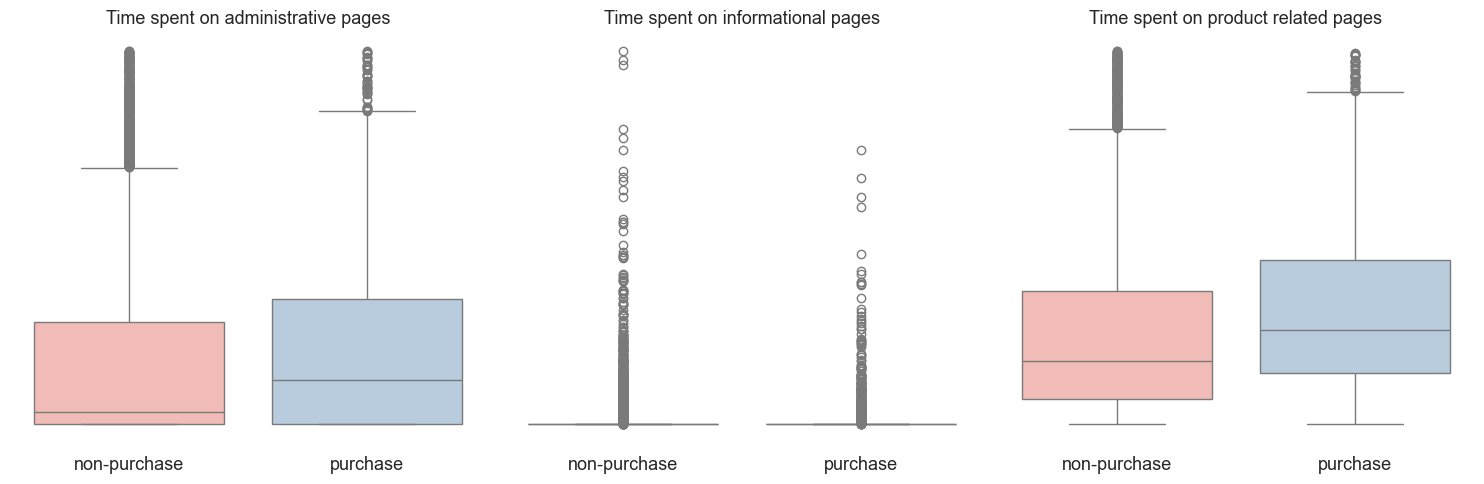

In [310]:
# TIME SPENT ON PAGES X REVENUE

# Temporary copy of the 'revenue' column with the new labels
data_copy['revenue_temp'] = data_copy['revenue'].map({False: 'non-purchase', True: 'purchase'})

plt.figure(figsize=(15, 5))
sns.set_style('white')

# administrative 
plt.subplot(1, 3, 1)
sns.boxplot(x='revenue_temp', y='administrative_duration', data=data_copy, palette='Pastel1', hue='revenue_temp', legend=False)
plt.title('Time spent on administrative pages', fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelsize=13)
sns.despine(bottom=True, left=True)

# informational
plt.subplot(1, 3, 2)
sns.boxplot(x='revenue_temp', y='informational_duration', data=data_copy, palette='Pastel1', hue='revenue_temp', legend=False)
plt.title('Time spent on informational pages', fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelsize=13)
sns.despine(bottom=True, left=True)

# productrelated 
plt.subplot(1, 3, 3)
sns.boxplot(x='revenue_temp', y='productrelated_duration', data=data_copy, palette='Pastel1', hue='revenue_temp', legend=False)
plt.title('Time spent on product related pages', fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelsize=13)
sns.despine(bottom=True, left=True)

plt.tight_layout()

plt.show()

Users who make purchases tend to spend more time on both administrative and product-related pages. However, the average time spent on pages with informational content tends towards 0 for both purchasers and non-purchasers. This phenomenon may be attributed to the significant number of extreme values in the "informational_duration" variable, which I chose not to remove to preserve the integrity of its distribution.

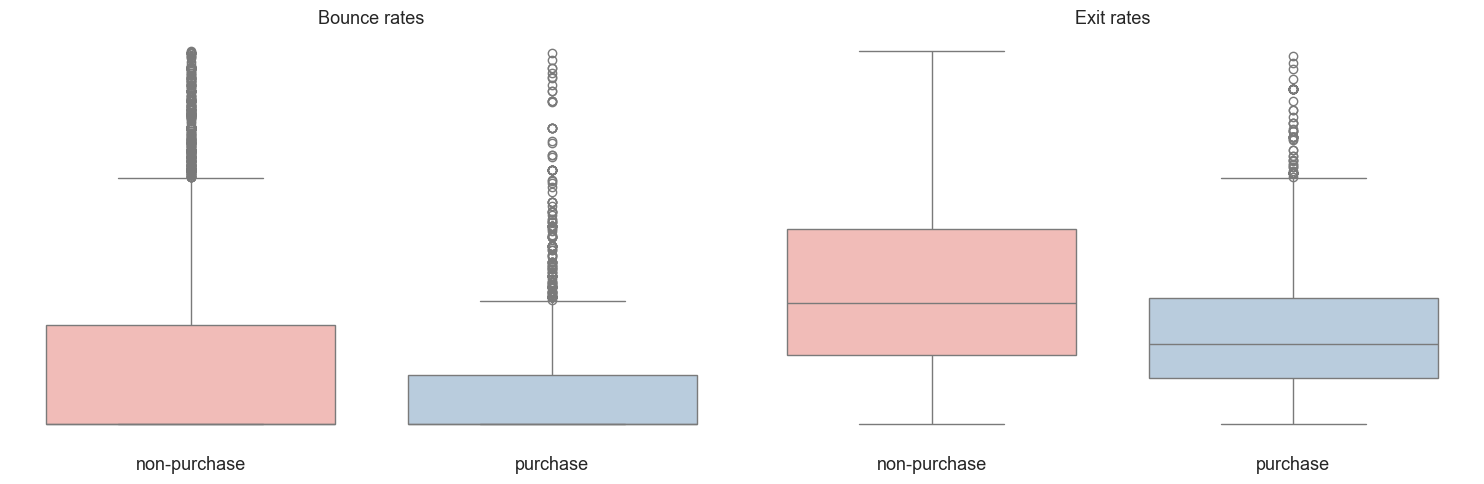

In [311]:
# BOUNCE RATES X EXIT RATES X REVENUE


plt.figure(figsize=(15, 5))
sns.set_style('white')

# bouncerates
plt.subplot(1, 2, 1)
sns.boxplot(y='bouncerates', x='revenue_temp', data=data_copy, palette='Pastel1', hue='revenue_temp', legend=False)
plt.title('Bounce rates', fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelsize=13)
sns.despine(bottom=True, left=True)

# exitrates
plt.subplot(1, 2, 2)
sns.boxplot(y='exitrates', x='revenue_temp', data=data_copy, palette='Pastel1', hue='revenue_temp', legend=False)
plt.title('Exit rates', fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelsize=13)
sns.despine(bottom=True, left=True)


plt.tight_layout()

Users who do not leave the site immediately after landing on the home page ("bouncerates") or after viewing several pages ("exitrates") are more likely to complete an e-commerce transaction.

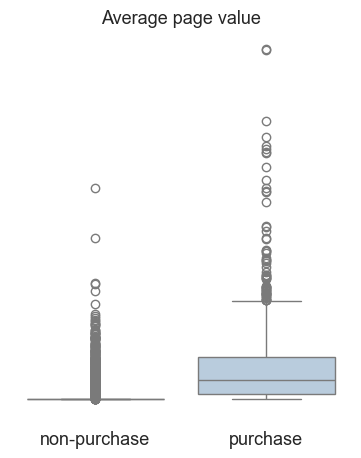

In [312]:
# AVERAGE PAGE VALUE x REVENUE

plt.figure(figsize=(15, 5))
sns.set_style('white')
 
plt.subplot(1, 3, 1)
sns.boxplot(y='pagevalues', x='revenue_temp', data=data_copy, palette='Pastel1', hue='revenue_temp', legend=False)
plt.title('Average page value', fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelsize=13)
sns.despine(bottom=True, left=True)

The average values of pages accessed by users who have made a purchase are significantly higher than those accessed by users who have not completed a transaction.

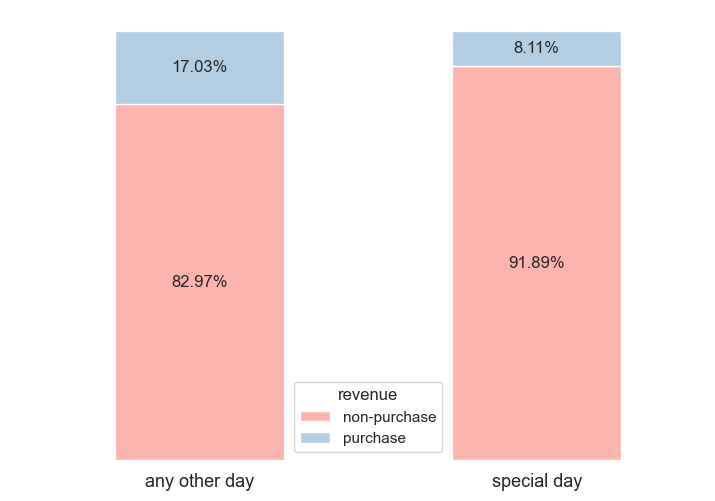

In [313]:
# SPECIAL DAY x REVENUE

sns.set_palette('Pastel1')

# Temporary copy of the 'revenue' column with the new labels
data_copy['specialday_temp'] = data_copy['specialday'].map({False: 'any other day', True: 'special day'})

palette = sns.color_palette('Pastel1')

# Closest colors in Pastel1 palette for 'non-purchase' (red) and 'purchase' (blue)
red_color = palette[0]  # Index 2 in Pastel1 is a red shade
blue_color = palette[1]  # Index 0 in Pastel1 is a blue shade
custom_colors = {'non-purchase': red_color, 'purchase': blue_color}

sns.set_style('white')

contingency_table = pd.crosstab(data_copy['specialday_temp'], data_copy['revenue_temp'])
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
percentages = proportions.mul(100)

# List of colors based on the columns
colors = [custom_colors[col] for col in percentages.columns]


ax = percentages.plot(kind='bar', stacked=True, figsize=(15, 5), color=colors)
for container in ax.containers:
    labels = [f'{v.get_height():.2f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=12)


plt.subplots_adjust(left=0.5, right=0.95, top=0.95, bottom=0.05)
plt.grid(False)
plt.ylabel(" ")
plt.title('')
plt.yticks([])
plt.xlabel('')
plt.xticks(rotation=0, ha='center', fontsize=13)
ax.legend(title="revenue")
sns.despine(bottom=True, left=True)

# Show the plot
plt.show()

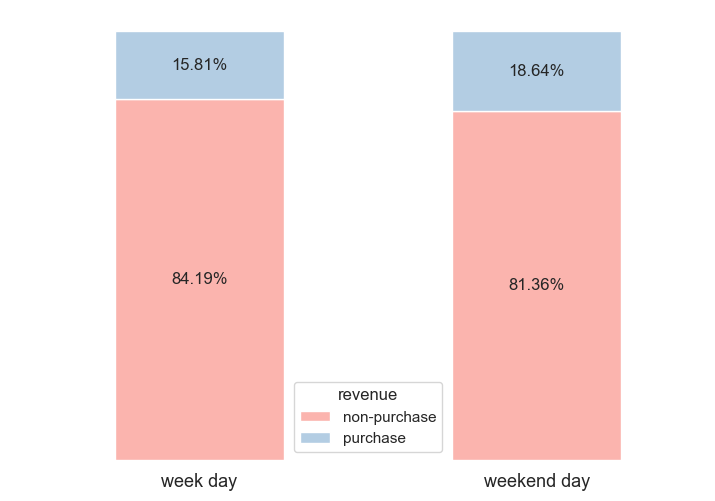

In [314]:
# WEEKEND x REVENUE

sns.set_palette('Pastel1')

data_copy['weekend_temp'] = data_copy['weekend'].map({False: 'week day', True: 'weekend day'})

palette = sns.color_palette('Pastel1')

red_color = palette[0]  # Index 2 in Pastel1 is a red shade
blue_color = palette[1]  # Index 0 in Pastel1 is a blue shade
custom_colors = {'non-purchase': red_color, 'purchase': blue_color}

sns.set_style('white')

contingency_table = pd.crosstab(data_copy['weekend_temp'], data_copy['revenue_temp'])
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
percentages = proportions.mul(100)

colors = [custom_colors[col] for col in percentages.columns]

ax = percentages.plot(kind='bar', stacked=True, figsize=(15, 5), color=colors)

for container in ax.containers:
    labels = [f'{v.get_height():.2f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=12)

plt.subplots_adjust(left=0.5, right=0.95, top=0.95, bottom=0.05)
plt.grid(False)
plt.ylabel(" ")
plt.title('')
plt.yticks([])
plt.xlabel('')
plt.xticks(rotation=0, ha='center', fontsize=13)
ax.legend(title="revenue")
sns.despine(bottom=True, left=True)

plt.show()

For the 'specialday' variable, the majority of transactions occurred on non-special days, accounting for about 17% of the total entries. This suggests that users are more likely to make purchases on random days rather than on special days. Additionally, for the 'weekend' variable, most purchases were made on weekends, representing about 19% of the total entries. However, there is no significant difference compared to weekdays, which account for 16% of the purchases.

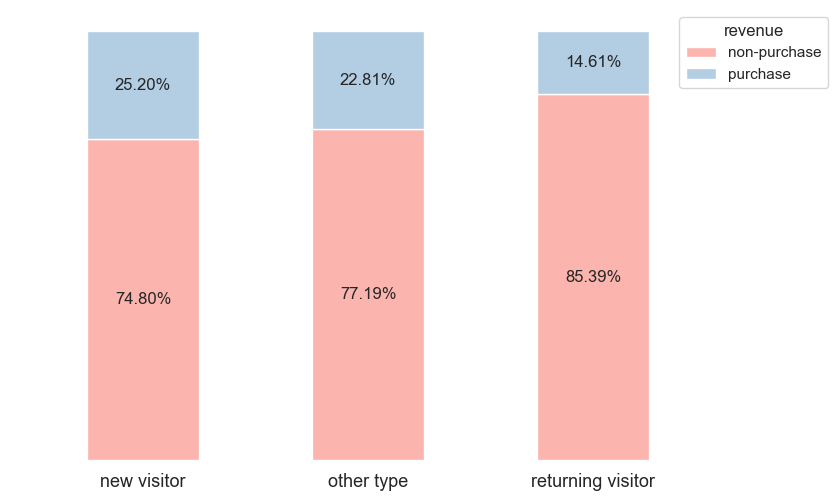

In [315]:
# VISITOR TYPE x REVENUE

sns.set_palette('Pastel1')

data_copy['visitor_temp'] = data_copy['visitortype'].map({'Returning_Visitor': 'returning visitor',
    'New_Visitor': 'new visitor',
    'Other': 'other type'})

palette = sns.color_palette('Pastel1')

red_color = palette[0]  
blue_color = palette[1] 
custom_colors = {'non-purchase': red_color, 'purchase': blue_color}

sns.set_style('white')

contingency_table = pd.crosstab(data_copy['visitor_temp'], data_copy['revenue_temp'])
proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
percentages = proportions.mul(100)

colors = [custom_colors[col] for col in percentages.columns]

ax = percentages.plot(kind='bar', stacked=True, figsize=(15, 5), color=colors)

for container in ax.containers:
    labels = [f'{v.get_height():.2f}%' if v.get_height() > 0 else '' for v in container]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=12)

plt.subplots_adjust(left=0.5, right=0.95, top=0.95, bottom=0.05)
plt.grid(False)
plt.ylabel(" ")
plt.title('')
plt.yticks([])
plt.xlabel('')
plt.xticks(rotation=0, ha='center', fontsize=13)
ax.legend(title="revenue", bbox_to_anchor=(0.95, 1), loc='upper left')
sns.despine(bottom=True, left=True)

plt.show()

New visitors account for the highest proportion of transactions, making up about 25% of the total, compared to returning visitors, who account for approximately 15%. However, these percentages are influenced by the skewed distribution of the 'visitortype' variable, as the number of returning users is significantly higher than that of new visitors.

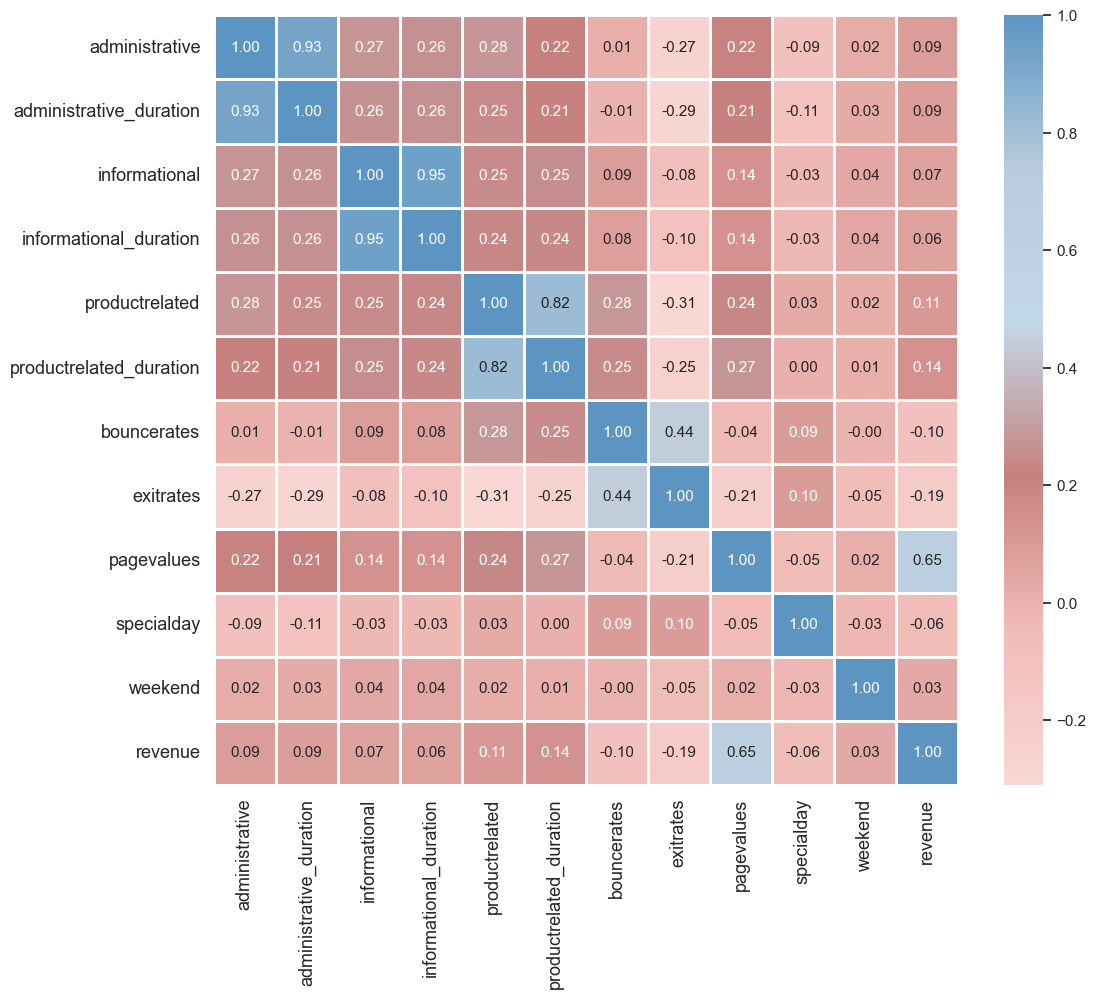

In [316]:
# Correlation matrix
import matplotlib.colors as mcolors

num_var = ['administrative', 'administrative_duration', 'informational', 'informational_duration', 
                'productrelated', 'productrelated_duration', 'bouncerates', 'exitrates', 'pagevalues', 'specialday', 'weekend', 'revenue']

corr_matrix = data_copy[num_var].corr(method='spearman')

base_color1 = '#f1bcb8'
base_color2 = '#b9ccdd'

lighter_color1 = '#f8d7d4'  
medium_color1 = '#e39e98'   
darker_color1 = '#c6817e'  
lighter_color2 = '#c2d7e8'  
medium_color2 = '#92b7d3'   
darker_color2 = '#5d95c2'

pastel_gradient_colors = [lighter_color1, base_color1, darker_color1, lighter_color2, base_color2, darker_color2]
pastel_gradient_cmap = mcolors.LinearSegmentedColormap.from_list('pastel_gradient', pastel_gradient_colors, N=256)

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, annot_kws={'fontsize':11}, fmt='.2f', linewidths=2, cmap=pastel_gradient_cmap)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.show()

Given the abnormal distributions of numeric variables and the presence of numerous extreme values, I utilized the Spearman coefficient. This non-parametric metric evaluates relationships among variables through monotonic functions, either increasing or decreasing.

Very strong positive correlations are evident among the following variables: "administrative_duration" and "administrative" (r=0.93), "informational_duration" and "informational" (r=0.95), and "productrelated_duration" and "productrelated" (r=0.82). This indicates that as access to pages of a certain content type increases, the time spent on those pages also rises.

"Pagevalues" and "revenue" show a moderate positive correlation (r=0.65), suggesting that increased access to high-value pages correlates with a higher probability of transactions. Another moderate positive correlation exists between "exitrates" and "bouncerates" (r=0.44), indicating that pages with high bounce rates also tend to have high exit rates.

Although accessing product-related pages is associated with a higher probability of purchases, the correlation is very weak (r=0.11).

Negative correlations are also notable. As the exit rate decreases (indicating users are less likely to leave the site), the time spent on product-related pages increases (r=-0.31), and similarly for administrative pages (r=-0.29). Furthermore, a decrease in the exit rate correlates with an increased likelihood of purchasing, although the relationship is weak (r=-0.19).

In summary, users who do not leave the site immediately are more likely to spend time on product-related or administrative pages and complete a transaction.

#### Multivariate analysis

<Figure size 2500x2000 with 0 Axes>

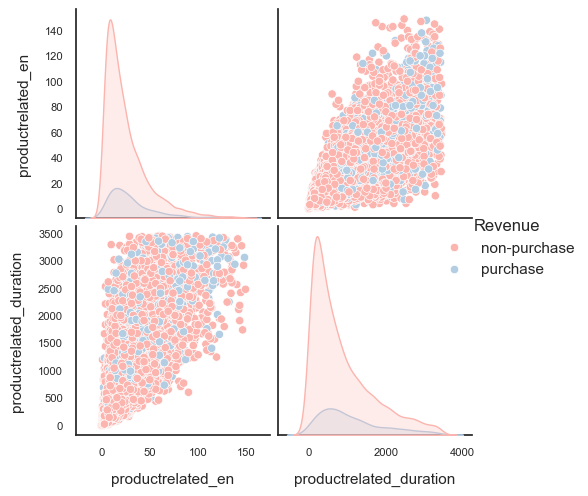

In [317]:
# PRODUCTRELATED x PRODUCTRELATED_DURATION x REVENUE

le = LabelEncoder()

# Encode the categorical column
data_copy['productrelated_en'] = le.fit_transform(data_copy['productrelated'])

# Create the pairplot using the encoded column
sns.set_style('white')
plt.figure(figsize=(25,20))

pairplot = sns.pairplot(data_copy, vars=["productrelated_en", "productrelated_duration"], hue="revenue", palette='Pastel1', diag_kind="kde")

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=11, labelpad=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=11, labelpad=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
pairplot._legend.set_title("Revenue")
pairplot._legend.texts[0].set_text("non-purchase")
pairplot._legend.texts[1].set_text("purchase")

plt.show()

<Figure size 2500x2000 with 0 Axes>

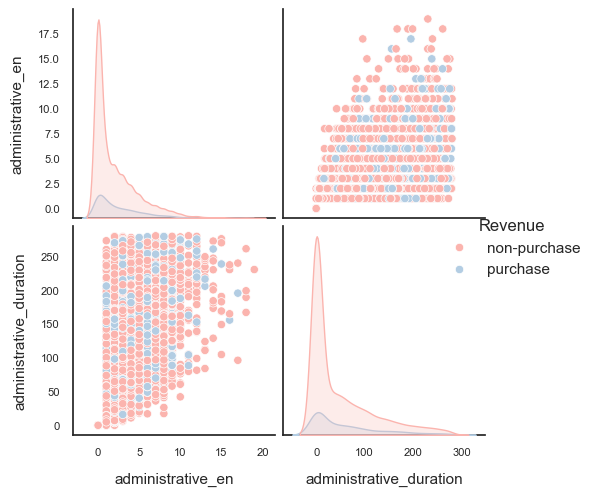

In [318]:
# ADMINISTRATIVE x ADMINISTRATIVE_DURATION x REVENUE

data_copy['administrative_en'] = le.fit_transform(data_copy['administrative'])

# Create the pairplot using the encoded column
sns.set_style('white')
plt.figure(figsize=(25,20))

pairplot = sns.pairplot(data_copy, vars=["administrative_en", "administrative_duration"], hue="revenue", palette='Pastel1', diag_kind="kde")

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=11, labelpad=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=11, labelpad=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
pairplot._legend.set_title("Revenue")
pairplot._legend.texts[0].set_text("non-purchase")
pairplot._legend.texts[1].set_text("purchase")

plt.show()

<Figure size 2500x2000 with 0 Axes>

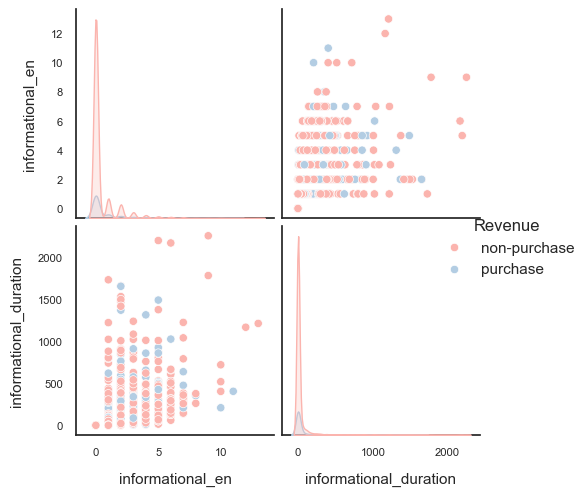

In [319]:
# INFORMATIONAL x INFORMATIONAL_DURATION x REVENUE

data_copy['informational_en'] = le.fit_transform(data_copy['informational'])

# Create the pairplot using the encoded column
sns.set_style('white')
plt.figure(figsize=(25,20))

pairplot = sns.pairplot(data_copy, vars=["informational_en", "informational_duration"], hue="revenue", palette='Pastel1', diag_kind="kde")

for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=11, labelpad=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=11, labelpad=10)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
pairplot._legend.set_title("Revenue")
pairplot._legend.texts[0].set_text("non-purchase")
pairplot._legend.texts[1].set_text("purchase")

plt.show()

Most users spend the majority of their time on the initial pages of the site. For administrative pages, users focus primarily on the first 15 pages, while for informational pages, they concentrate on the first 8 pages. Despite having the highest number of product-related pages (311), users spend the most time on just the first 100 pages. According to the graphs, users who make purchases do not visit or spend much time on these pages, although this trend might be influenced by the class imbalance in the target variable. Additionally, there is noticeable multicollinearity between the "productrelated" and "productrelated_duration" variables, as their relationship is approximately linear.

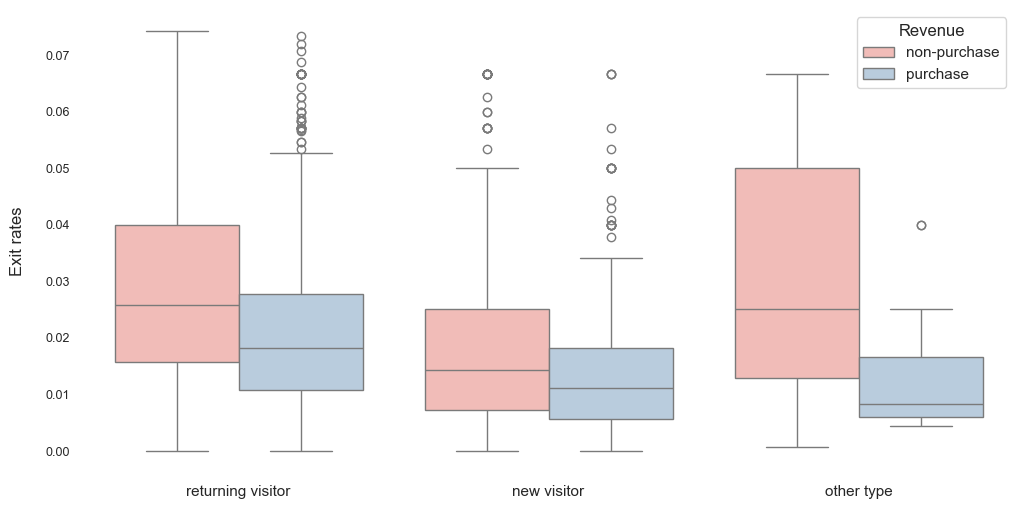

In [320]:
# VISITORTYPE x EXITRATES x REVENUE

fig = plt.figure(figsize=(12, 6))


sns.boxplot(x = data_copy['visitor_temp'], y = data_copy['exitrates'], hue = data_copy['revenue_temp'], palette = 'Pastel1')
plt.legend(title = 'Revenue')
plt.ylabel('Exit rates', labelpad=15)
plt.xlabel('', labelpad=20)
plt.yticks(fontsize=9)
sns.despine(bottom=True, left=True)
plt.show()

When a transaction is completed, the exit rate is very low. This trend is observed among new users, regardless of whether they have made a purchase, indicating a heightened interest in the website. Conversely, users categorized as "Other type" exhibit the highest exit rate and rarely make purchases. Returning users, however, demonstrate a moderate exit rate and the highest purchase rate, suggesting that they are loyal customers who trust the website's products or services.

In [321]:
# Drop the unnecessary columns
data_copy.drop(columns=['revenue_temp', 'weekend_temp', 'visitor_temp', 'specialday_temp', 'productrelated_en', 
                        'administrative_en', 'informational_en'], inplace=True)


In [324]:
# Changing the data type of 'visitortype'
data_copy['visitortype'] = data_copy['visitortype'].astype('category')

In [326]:
# Checking dtypes for all variables
data_copy.dtypes

administrative             category
administrative_duration     float64
informational              category
informational_duration      float64
productrelated             category
productrelated_duration     float64
bouncerates                 float64
exitrates                   float64
pagevalues                  float64
specialday                     bool
operatingsystems           category
browser                    category
region                     category
traffictype                category
visitortype                category
weekend                        bool
revenue                        bool
dtype: object

In [327]:
# Encoding the 'visitortype' variable

encoder = LabelEncoder()

data_copy['visitortype'] = encoder.fit_transform(data_copy['visitortype'])

data_copy.head()

,administrative,administrative_duration,informational,informational_duration,productrelated,productrelated_duration,bouncerates,exitrates,pagevalues,specialday,operatingsystems,browser,region,traffictype,visitortype,weekend,revenue
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,False,3,3,1,4,2,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,False,2,2,1,3,2,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,False,2,4,1,2,2,False,False
10,0,0.0,0,0.0,3,395.000000,0.000000,0.066667,0.0,False,1,1,3,3,2,False,False
11,0,0.0,0,0.0,16,407.750000,0.018750,0.025833,0.0,False,1,1,4,3,2,False,False


### ML Modeling 

#### Train-test split

In [328]:
y = data_copy['revenue']
x = data_copy.drop(['revenue'], axis=1)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=2)

for train_index, test_index in sss.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Standardizing
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [329]:

x.columns


Index(['administrative', 'administrative_duration', 'informational',
       'informational_duration', 'productrelated', 'productrelated_duration',
       'bouncerates', 'exitrates', 'pagevalues', 'specialday',
       'operatingsystems', 'browser', 'region', 'traffictype', 'visitortype',
       'weekend'],
      dtype='object')

To address class imbalance, I employed the "StratifiedShuffleSplit" method for the train-test split. This technique preserves the class distribution proportions and helps mitigate existing imbalances. Additionally, by shuffling the data before splitting, it reduces the risk of overfitting. Another advantage of this method is its ability to create multiple splits, enhancing the robustness of the models by allowing performance evaluation on different data subsets.

To tackle the issue of asymmetric variable distributions, I standardized them using "RobustScaler". This method is resilient to extreme values as it relies on the median and interquartile range, ensuring more stable scaling.

#### Logistic Regression

Accuracy: 0.8904109589041096
Precision: 0.8980005810206512
Recall 0.8904109589041096
F1 score: 0.8934505410557102
              precision    recall  f1-score   support

       False       0.95      0.92      0.93      1463
        True       0.65      0.74      0.69       289

    accuracy                           0.89      1752
   macro avg       0.80      0.83      0.81      1752
weighted avg       0.90      0.89      0.89      1752

[[1345  118]
 [  74  215]]


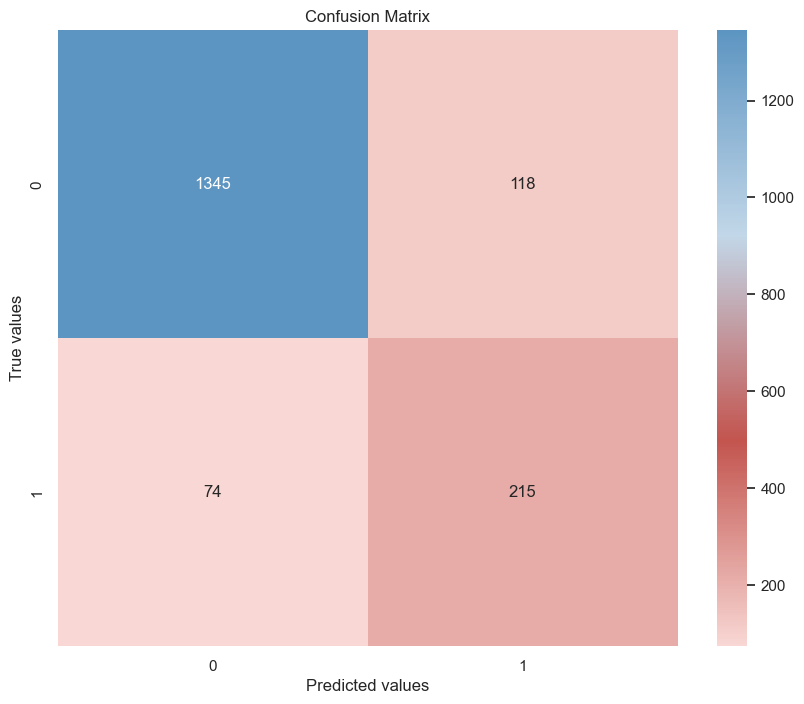

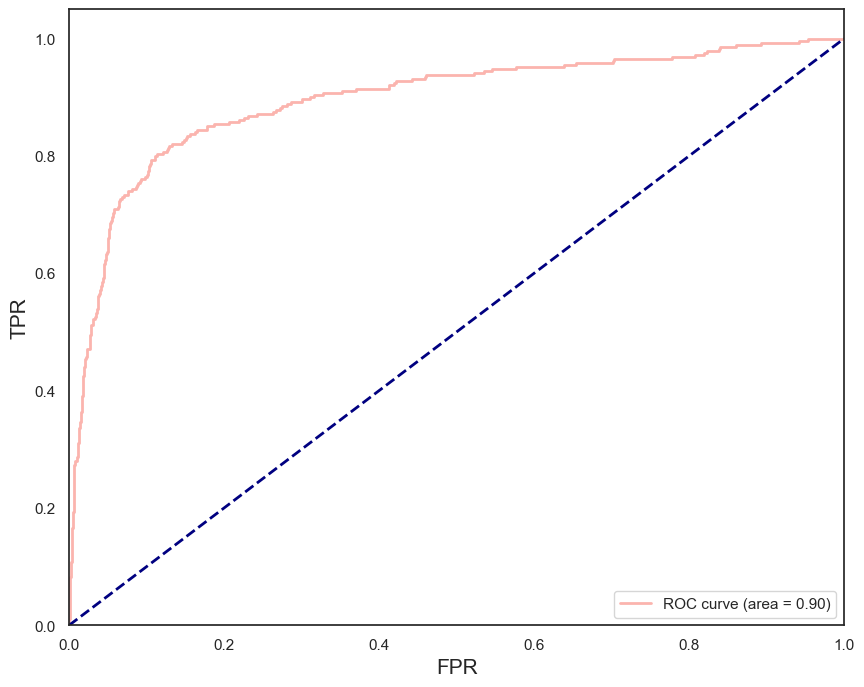

In [330]:
import matplotlib.colors as mcolors

log_reg = LogisticRegression(class_weight= 'balanced', max_iter=1000, random_state=42)

# training on the standardized data
log_reg.fit(x_train_scaled, y_train)

# predictions
y_pred = log_reg.predict(x_test_scaled)

# model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall", recall)
print("F1 score:", f1)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


lighter_color1 = '#f8d7d4'  
darker_color1 = '#c3544e'
lighter_color2 = '#c2d7e8'     
darker_color2 = '#5d95c2'

pastel_gradient_colors = [lighter_color1,  darker_color1, lighter_color2,  darker_color2]
pastel_gradient_cmap = mcolors.LinearSegmentedColormap.from_list('pastel_gradient', pastel_gradient_colors, N=256)

# Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap=pastel_gradient_cmap, fmt='d')
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_pred_proba_log = log_reg.predict_proba(x_test_scaled)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure(figsize=(10,8))
plt.plot(fpr_log, tpr_log, color='#fbb4ae', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log)  
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.legend(loc="lower right")
plt.show()



#### Decision Trees

Accuracy: 0.8670091324200914
Precision: 0.8675662256833678
Recall: 0.8670091324200914
F1 score: 0.8672842352267874
              precision    recall  f1-score   support

       False       0.92      0.92      0.92      1463
        True       0.60      0.60      0.60       289

    accuracy                           0.87      1752
   macro avg       0.76      0.76      0.76      1752
weighted avg       0.87      0.87      0.87      1752

[[1345  118]
 [ 115  174]]


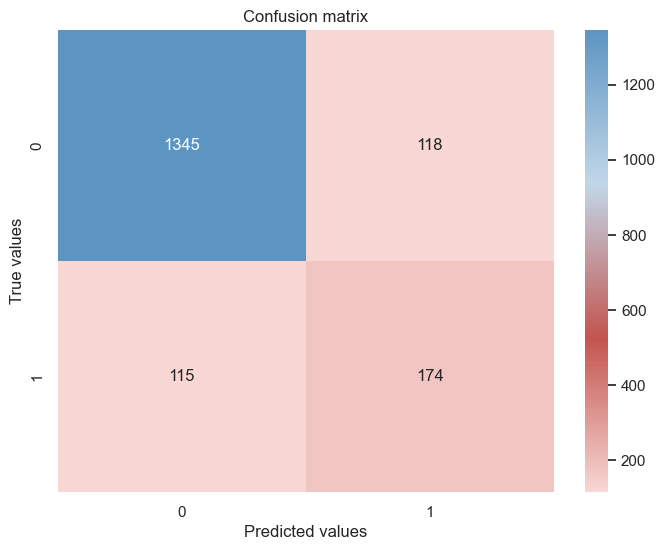

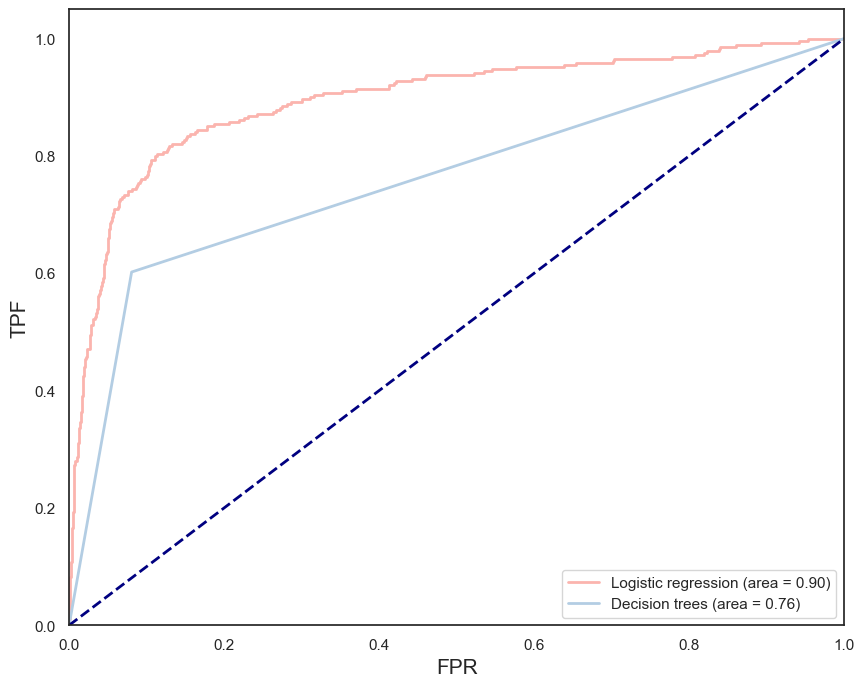

In [332]:

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# training on the standardized data
dt.fit(x_train_scaled, y_train)

# predictions
y_pred1 = dt.predict(x_test_scaled)

# model evaluation
accuracy = accuracy_score(y_test, y_pred1)
precision = precision_score(y_test, y_pred1, average='weighted')
recall = recall_score(y_test, y_pred1, average='weighted')
f1 = f1_score(y_test, y_pred1, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

print(classification_report(y_test, y_pred1))

print(confusion_matrix(y_test, y_pred1))

lighter_color1 = '#f8d7d4'  
darker_color1 = '#c3544e'
lighter_color2 = '#c2d7e8'     
darker_color2 = '#5d95c2'

pastel_gradient_colors = [lighter_color1,  darker_color1, lighter_color2,  darker_color2]
pastel_gradient_cmap = mcolors.LinearSegmentedColormap.from_list('pastel_gradient', pastel_gradient_colors, N=256)

# Confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, cmap=pastel_gradient_cmap, fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion matrix")
plt.show()

# ROC curve
y_pred_proba_dt = dt.predict_proba(x_test_scaled)[:,1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)


plt.figure(figsize=(10,8))
plt.plot(fpr_log, tpr_log, color='#fbb4ae', lw=2, label='Logistic regression (area = %0.2f)' % roc_auc_log)  
plt.plot(fpr_dt, tpr_dt, color='#b3cde3', lw=2, label='Decision trees (area = %0.2f)' % roc_auc_dt) 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPF', fontsize=15)
plt.legend(loc="lower right")
plt.show()



#### Random Forest

Accuracy: 0.8961187214611872
Precision: 0.9115108282270215
Recall: 0.8961187214611872
F1 score: 0.9011741852866142
              precision    recall  f1-score   support

       False       0.96      0.91      0.94      1463
        True       0.64      0.83      0.73       289

    accuracy                           0.90      1752
   macro avg       0.80      0.87      0.83      1752
weighted avg       0.91      0.90      0.90      1752

[[1330  133]
 [  49  240]]


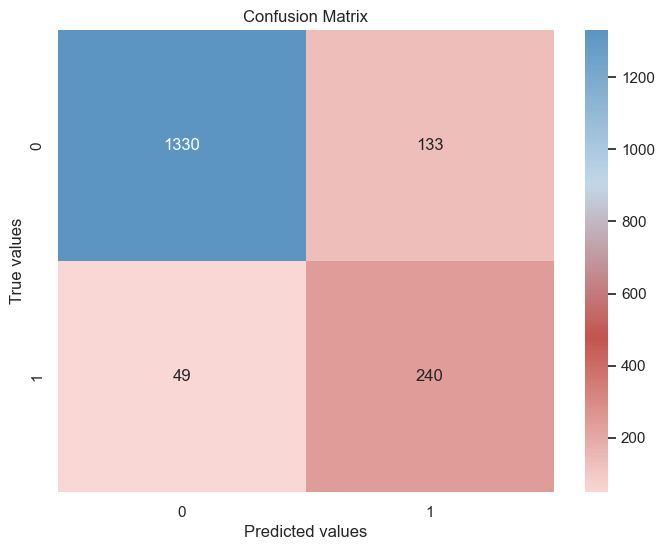

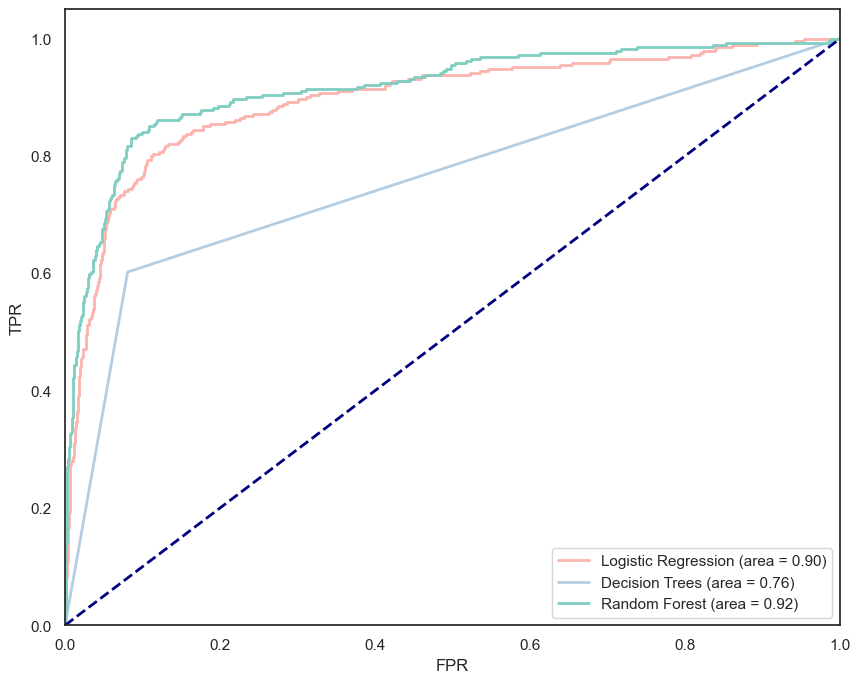

In [333]:
rf = RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=750, random_state=2)

# training on the standardized data
rf.fit(x_train_scaled, y_train)

# predictions
y_pred_proba_rff = rf.predict_proba(x_test_scaled)
y_pred2 = np.argmax(y_pred_proba_rff, axis=1)

# model evaluation
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2, average='weighted', labels=rf.classes_)
recall = recall_score(y_test, y_pred2, average='weighted', labels=rf.classes_)
f1 = f1_score(y_test, y_pred2, average='weighted', labels=rf.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

# custom colors
lighter_color1 = '#f8d7d4'  
darker_color1 = '#c3544e'
lighter_color2 = '#c2d7e8'     
darker_color2 = '#5d95c2'

pastel_gradient_colors = [lighter_color1,  darker_color1, lighter_color2,  darker_color2]
pastel_gradient_cmap = mcolors.LinearSegmentedColormap.from_list('pastel_gradient', pastel_gradient_colors, N=256)

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, cmap=pastel_gradient_cmap, fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion Matrix")
plt.show()

# ROC curve
y_pred_proba_rf = rf.predict_proba(x_test_scaled)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10,8))
plt.plot(fpr_log, tpr_log, color='#fbb4ae', lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_log)  
plt.plot(fpr_dt, tpr_dt, color='#b3cde3', lw=2, label='Decision Trees (area = %0.2f)' % roc_auc_dt) 
plt.plot(fpr_rf, tpr_rf, color='#80cdc1', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)  
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()



##  XGBoost

Accuracy: 0.8978310502283106
Precision: 0.8976897532146451
Recall: 0.8978310502283106
F1 score: 0.8977599684539609
              precision    recall  f1-score   support

       False       0.94      0.94      0.94      1463
        True       0.69      0.69      0.69       289

    accuracy                           0.90      1752
   macro avg       0.81      0.81      0.81      1752
weighted avg       0.90      0.90      0.90      1752

[[1374   89]
 [  90  199]]


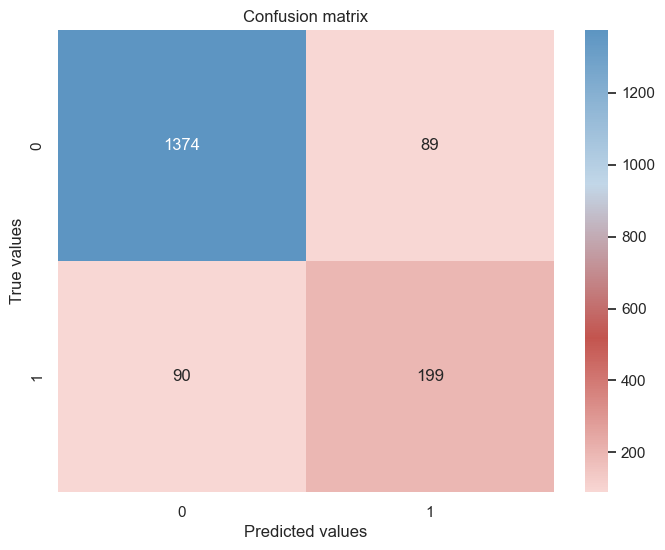

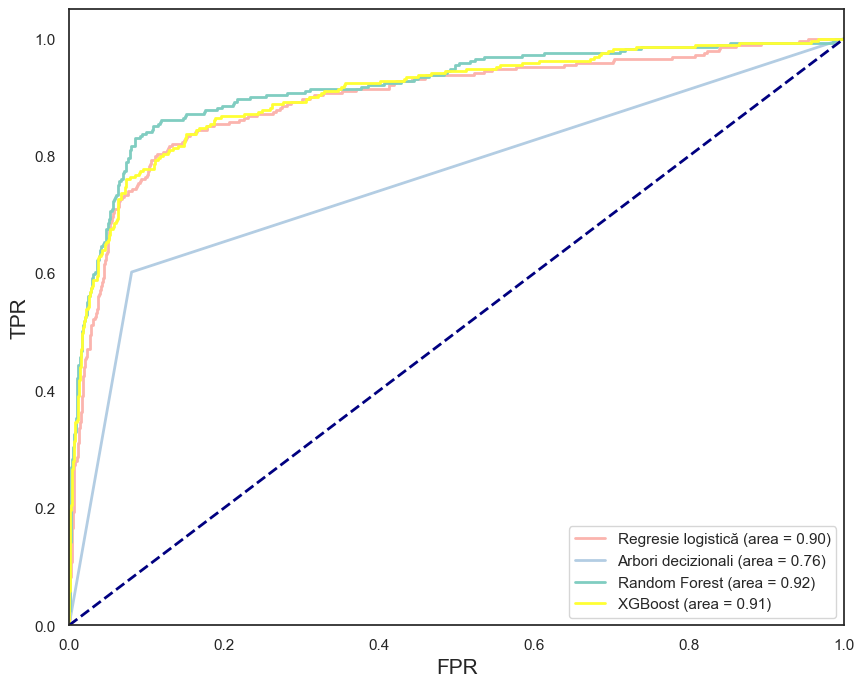

In [334]:
xgb_model  = xgb.XGBClassifier(objective='binary:logistic', max_depth=5, learning_rate=0.1, n_estimators=750, n_jobs=-1, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005, reg_lambda=0.005, scale_pos_weight=5, random_state=42)

# training on the standardized data
xgb_model.fit(x_train_scaled, y_train)

# predictions
y_pred_proba_xgb = xgb_model.predict_proba(x_test_scaled)

# model evaluation
accuracy = accuracy_score(y_test, y_pred_proba_xgb.argmax(axis=1))
precision = precision_score(y_test, y_pred_proba_xgb.argmax(axis=1), average='weighted', labels=xgb_model.classes_)
recall = recall_score(y_test, y_pred_proba_xgb.argmax(axis=1), average='weighted', labels=xgb_model.classes_)
f1 = f1_score(y_test, y_pred_proba_xgb.argmax(axis=1), average='weighted', labels=xgb_model.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print(classification_report(y_test, y_pred_proba_xgb.argmax(axis=1)))
print(confusion_matrix(y_test, y_pred_proba_xgb.argmax(axis=1)))

lighter_color1 = '#f8d7d4'  
darker_color1 = '#c3544e'
lighter_color2 = '#c2d7e8'     
darker_color2 = '#5d95c2'

pastel_gradient_colors = [lighter_color1,  darker_color1, lighter_color2,  darker_color2]
pastel_gradient_cmap = mcolors.LinearSegmentedColormap.from_list('pastel_gradient', pastel_gradient_colors, N=256)

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_proba_xgb.argmax(axis=1)), annot=True, cmap=pastel_gradient_cmap, fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion matrix")
plt.show()

# ROC curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10,8))
plt.plot(fpr_log, tpr_log, color='#fbb4ae', lw=2, label='Regresie logistică (area = %0.2f)' % roc_auc_log)  # light pink
plt.plot(fpr_dt, tpr_dt, color='#b3cde3', lw=2, label='Arbori decizionali (area = %0.2f)' % roc_auc_dt)  # light blue
plt.plot(fpr_rf, tpr_rf, color='#80cdc1', lw=2, label='Random Forest (area = %0.2f)' % roc_auc_rf)  # dark green
plt.plot(fpr_xgb, tpr_xgb, color='#ffff33', lw=2, label='XGBoost (area = %0.2f)' % roc_auc_xgb)  # yellow
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.legend(loc="lower right")
plt.show()

After applying four classification models—logistic regression, decision trees, Random Forest, and XGBoost—I observed significant differences in their performance.

**Logistic Regression**: Achieved an accuracy of 0.89, correctly predicting 89% of users classified as buyers. The recall of 0.89 indicates the model accurately identifies 89% of actual buyers. However, it tends to misclassify buyers as non-buyers, with 74 false positives. With an F1 score of 0.89, an AUC score of 0.90, and a strong ROC curve, logistic regression demonstrates very good performance and discrimination ability.

**Decision Trees**: Displayed lower precision and recall scores (0.86). This model also has a higher false positive rate (115), which reduces its reliability. The F1 score of 0.86, coupled with a lower AUC score of 0.76 and a less effective ROC curve, shows that decision trees underperform compared to logistic regression in both overall performance and discriminative ability.

**XGBoost**: Performed similarly to logistic regression, with precision and recall both at 0.89. Despite a decent F1 score of 0.89 and a slightly higher AUC score of 0.91, XGBoost struggles with reducing false positives (90). Nonetheless, it outperforms decision trees.

**Random Forest**: Stood out with the highest precision (0.91) and strong recall (0.89). The model significantly reduces false positives to 49, demonstrating its ability to correctly classify buyers. It boasts an F1 score of 0.90, an AUC score of 0.92, and an excellent ROC curve, indicating superior performance and discrimination ability.

Considering all performance metrics, Random Forest emerges as the best-performing model among the four.

#### Feature Importance on Random Forest

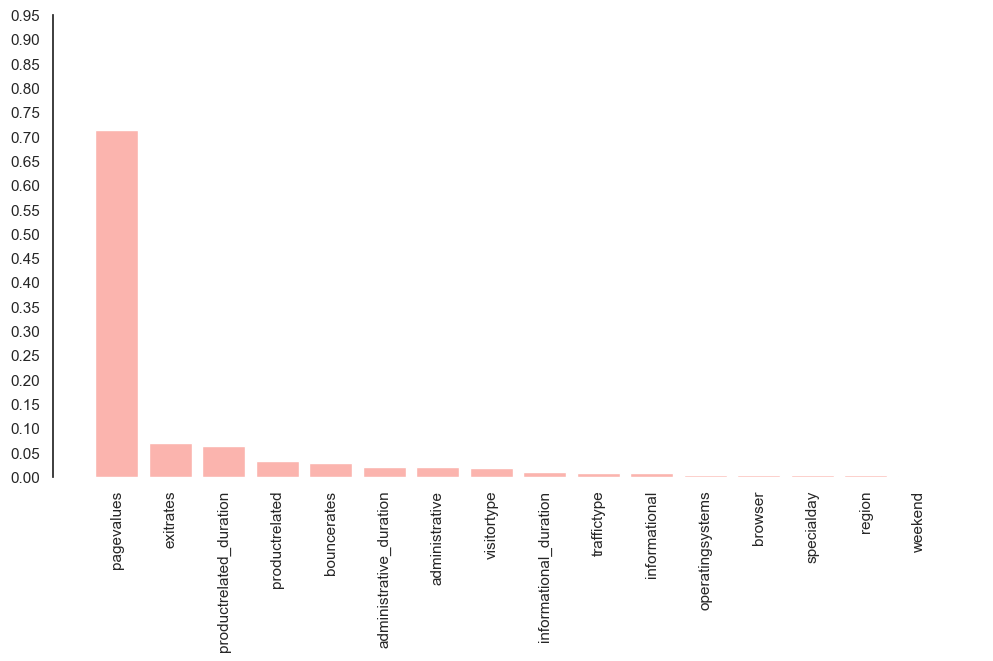

In [335]:

sns.set_palette('Pastel1')

feature_importances = rf.feature_importances_

feature_names = x.columns # I want the names of the characteristics

# sorting
indices = np.argsort(feature_importances)[::-1]

# plots
plt.figure(figsize=(12, 6))
plt.bar(range(x.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=90)
plt.yticks(np.arange(0, 1, 0.05))
plt.title("")
sns.despine(bottom=True)
plt.show()


In [336]:

# Table with top features
importance_table = pd.DataFrame({
    'Feature': feature_names[indices],
    'Importance': feature_importances[indices]
})

print(importance_table.head(18))

                    Feature  Importance
0                pagevalues    0.713562
1                 exitrates    0.068428
2   productrelated_duration    0.063753
3            productrelated    0.032223
4               bouncerates    0.026972
5   administrative_duration    0.020625
6            administrative    0.018724
7               visitortype    0.017653
8    informational_duration    0.008621
9               traffictype    0.007663
10            informational    0.006632
11         operatingsystems    0.003825
12                  browser    0.003425
13               specialday    0.003373
14                   region    0.003196
15                  weekend    0.001325


#### Random forest with the 4 most important features

In [337]:

simple_model = data_copy.drop(['weekend', 'region', 'specialday', 'browser', 'operatingsystems', 
                               'informational', 'traffictype', 'informational_duration', 'visitortype', 'administrative', 'administrative_duration',
                               'bouncerates'], axis=1)

x_simpl = simple_model.drop('revenue', axis=1)
y_simpl = simple_model['revenue']

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

for train_index, test_index in cv.split(x_simpl, y_simpl):
    x_train_simpl, x_test_simpl = x_simpl.iloc[train_index], x_simpl.iloc[test_index]
    y_train_simpl, y_test_simpl = y_simpl.iloc[train_index], y_simpl.iloc[test_index]

    # Standardization
    scaler = RobustScaler()
    x_train_scaled_simpl = scaler.fit_transform(x_train_simpl)
    x_test_scaled_simpl = scaler.transform(x_test_simpl)


Accuracy: 0.8732876712328768
Precision: 0.8983109140945089
Recall: 0.8732876712328768
F1 score: 0.8812620477827302
              precision    recall  f1-score   support

       False       0.96      0.88      0.92      1463
        True       0.58      0.82      0.68       289

    accuracy                           0.87      1752
   macro avg       0.77      0.85      0.80      1752
weighted avg       0.90      0.87      0.88      1752

[[1294  169]
 [  53  236]]


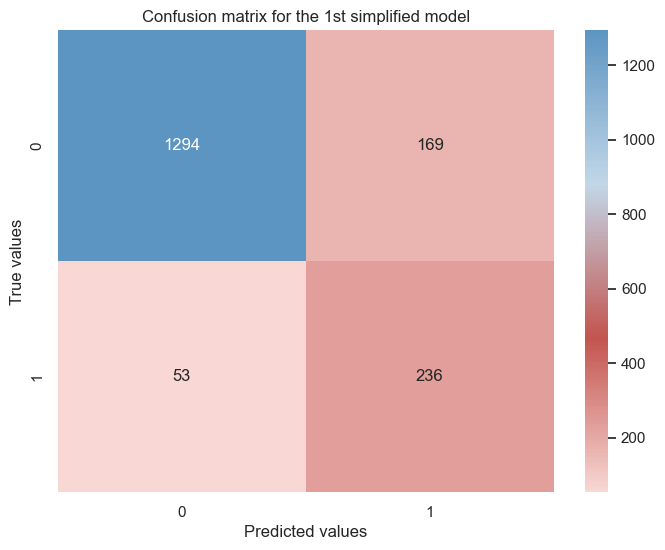

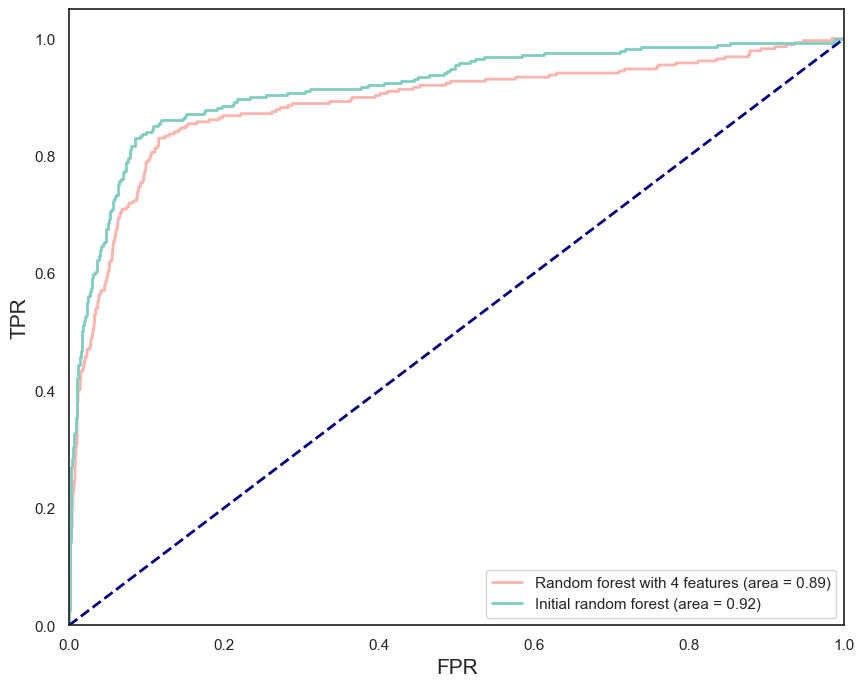

In [339]:

rf2 = RandomForestClassifier(class_weight='balanced', max_depth=5, n_estimators=750, random_state=42)

# training on standardized data
rf2.fit(x_train_scaled_simpl, y_train_simpl)

# predictions
y_pred_proba_rf2 = rf2.predict_proba(x_test_scaled_simpl)
y_pred_rf2 = np.argmax(y_pred_proba_rf2, axis=1)

# model evaluation
accuracy = accuracy_score(y_test_simpl, y_pred_rf2)
precision = precision_score(y_test_simpl, y_pred_rf2, average='weighted', labels=rf2.classes_)
recall = recall_score(y_test_simpl, y_pred_rf2, average='weighted', labels=rf2.classes_)
f1 = f1_score(y_test_simpl, y_pred_rf2, average='weighted', labels=rf2.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print(classification_report(y_test_simpl, y_pred_rf2))
print(confusion_matrix(y_test_simpl, y_pred_rf2))

lighter_color1 = '#f8d7d4'  
darker_color1 = '#c3544e'
lighter_color2 = '#c2d7e8'     
darker_color2 = '#5d95c2'

pastel_gradient_colors = [lighter_color1,  darker_color1, lighter_color2,  darker_color2]
pastel_gradient_cmap = mcolors.LinearSegmentedColormap.from_list('pastel_gradient', pastel_gradient_colors, N=256)

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_simpl, y_pred_rf2), annot=True, cmap=pastel_gradient_cmap, fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion matrix for the 1st simplified model")
plt.show()

# ROC curve
y_pred_proba_rf2 = rf2.predict_proba(x_test_scaled_simpl)[:,1]
fpr_rf2, tpr_rf2, _ = roc_curve(y_test_simpl, y_pred_proba_rf2)
roc_auc_rf2 = auc(fpr_rf2, tpr_rf2)

plt.figure(figsize=(10,8))
plt.plot(fpr_rf2, tpr_rf2, color='#fbb4ae', lw=2, label='Random forest with 4 features (area = %0.2f)' % roc_auc_rf2)
plt.plot(fpr_rf, tpr_rf, color='#80cdc1', lw=2, label='Initial random forest (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.legend(loc="lower right")
plt.show()
   


#### Random forest with the 8 most important features

In [340]:

simple_model2 = data_copy.drop(['weekend', 'region', 'specialday', 'browser', 'operatingsystems', 
                               'informational', 'traffictype', 'informational_duration'], axis=1)


x2 = simple_model2.drop('revenue', axis=1)
y2 = simple_model2['revenue']

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=2)

for train_index, test_index in cv.split(x2, y2):
    x_train_2, x_test_2 = x2.iloc[train_index], x2.iloc[test_index]
    y_train_2, y_test_2 = y2.iloc[train_index], y2.iloc[test_index]

    # Standardization
    scaler = RobustScaler()
    x_train_scaled_2 = scaler.fit_transform(x_train_2)
    x_test_scaled_2 = scaler.transform(x_test_2)

Accuracy: 0.9098173515981736
Precision: 0.9069899130614245
Recall: 0.9098173515981736
F1 score: 0.9006423047561609
              precision    recall  f1-score   support

       False       0.91      0.98      0.95      1463
        True       0.87      0.53      0.66       289

    accuracy                           0.91      1752
   macro avg       0.89      0.76      0.80      1752
weighted avg       0.91      0.91      0.90      1752

[[1440   23]
 [ 135  154]]


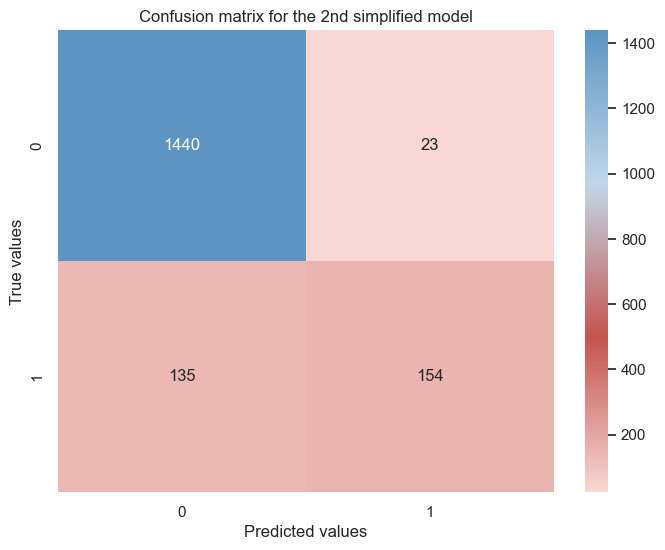

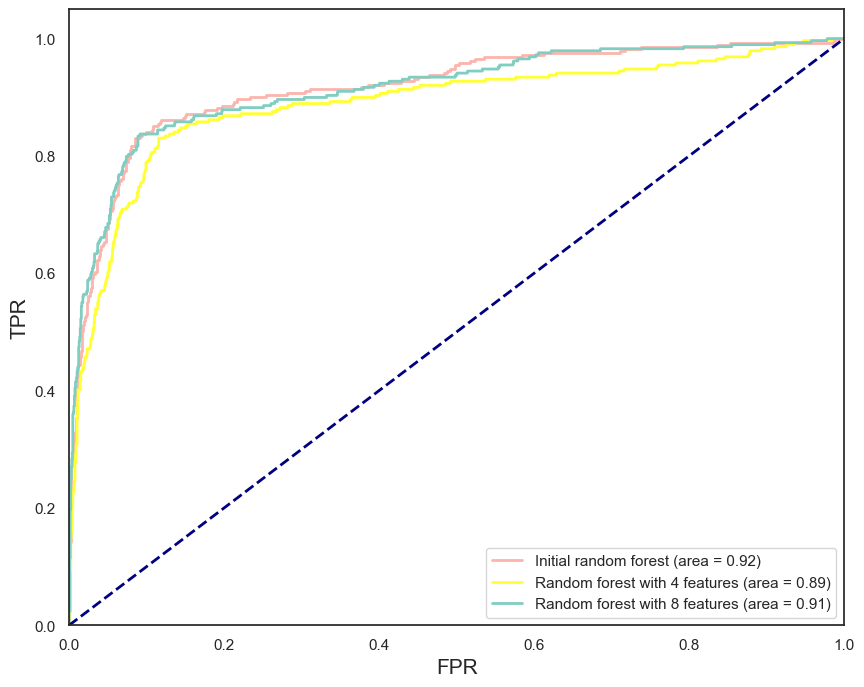

In [341]:
rf3 = RandomForestClassifier(max_depth=5, n_estimators=750, random_state=2)

# training on the standardized data
rf3.fit(x_train_scaled_2, y_train_2)

# predictions
y_pred_proba_rf3 = rf3.predict_proba(x_test_scaled_2)
y_pred_rf3 = np.argmax(y_pred_proba_rf3, axis=1)

# model evaluation
accuracy = accuracy_score(y_test_2, y_pred_rf3)
precision = precision_score(y_test_2, y_pred_rf3, average='weighted', labels=rf3.classes_)
recall = recall_score(y_test_2, y_pred_rf3, average='weighted', labels=rf3.classes_)
f1 = f1_score(y_test_2, y_pred_rf3, average='weighted', labels=rf3.classes_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)
print(classification_report(y_test_2, y_pred_rf3))
print(confusion_matrix(y_test_2, y_pred_rf3))

ighter_color1 = '#f8d7d4'  
darker_color1 = '#c3544e'
lighter_color2 = '#c2d7e8'     
darker_color2 = '#5d95c2'

pastel_gradient_colors = [lighter_color1,  darker_color1, lighter_color2,  darker_color2]
pastel_gradient_cmap = mcolors.LinearSegmentedColormap.from_list('pastel_gradient', pastel_gradient_colors, N=256)

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test_2, y_pred_rf3), annot=True, cmap=pastel_gradient_cmap, fmt="d")
plt.xlabel("Predicted values")
plt.ylabel("True values")
plt.title("Confusion matrix for the 2nd simplified model")
plt.show()

# ROC curve
y_pred_proba_rf3 = rf3.predict_proba(x_test_scaled_2)[:,1]
fpr_rf3, tpr_rf3, _ = roc_curve(y_test_2, y_pred_proba_rf3)
roc_auc_rf3 = auc(fpr_rf3, tpr_rf3)

plt.figure(figsize=(10,8))
plt.plot(fpr_rf, tpr_rf, color='#fbb4ae', lw=2, label='Initial random forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_rf2, tpr_rf2, color='#ffff33', lw=2, label='Random forest with 4 features (area = %0.2f)' % roc_auc_rf2)
plt.plot(fpr_rf3, tpr_rf3, color='#80cdc1', lw=2, label='Random forest with 8 features (area = %0.2f)' % roc_auc_rf3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.legend(loc="lower right")
plt.show()

In the first simplified model, I included the top 4 variables with an importance greater than 0.02. I applied the same methods to address class imbalance (StratifiedShuffleSplit and class_weight), and standardized the input variables. However, the model's performance did not improve, with an F1 score of 0.88 compared to the original model's 0.90. Both precision (0.89) and recall (0.87) decreased, and the confusion matrix indicates an increase in false positives (FP=53). The subpar performance is evident in both the AUC value (0.89) and the ROC curve.

For the second simplified model, I included the top 8 variables with significance starting at 0.01. Despite achieving an F1 score, precision, and recall of 0.90, the model did not excel. The confusion matrix reveals a notable increase in false positives (FP=135), and the AUC score is lower (0.91) compared to the initial model.

Upon evaluating the performance of models adjusted based on the most important features, it is clear that the initial model containing all input variables performs the best. In addition to favorable metrics, it exhibits the lowest number of false positives, indicating a higher likelihood of correctly classifying users who make a purchase. 

### Cluster Analyzes


##### ADMINISTRATIVE_DURATION x EXITRATES

In [342]:
# get the variables from the data_copy
data1 = data_copy.iloc[:, [1, 7]].values

In [343]:
# standardizing
scaler=RobustScaler()
var_scaled=scaler.fit_transform(data1)

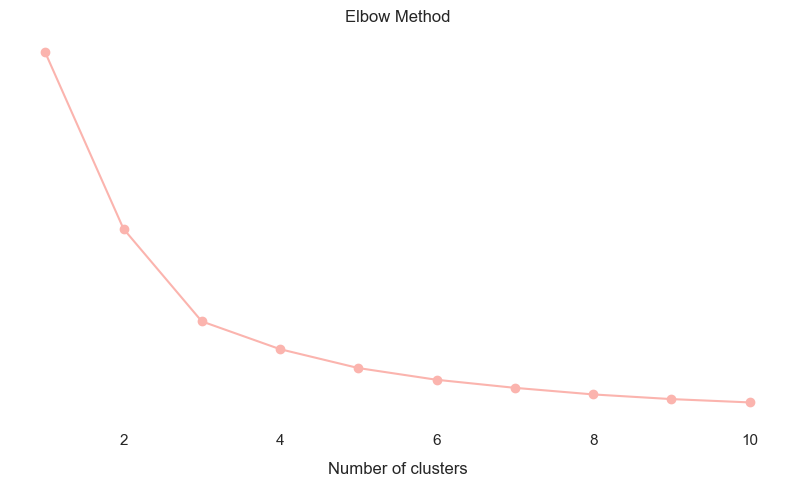

Number of clusters: 2, Silhouette Score: 0.4783
Number of clusters: 3, Silhouette Score: 0.4671
Number of clusters: 4, Silhouette Score: 0.4418
Number of clusters: 5, Silhouette Score: 0.4159
Number of clusters: 6, Silhouette Score: 0.4303
Number of clusters: 7, Silhouette Score: 0.4250
Number of clusters: 8, Silhouette Score: 0.4162
Number of clusters: 9, Silhouette Score: 0.4223
Number of clusters: 10, Silhouette Score: 0.4084


In [347]:
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

# Elbow method
wcss = []
for i in range(1, 11):
    km1 = KMeans(n_clusters=i,
               init='k-means++',
               max_iter=300,
               n_init=10, 
               random_state=42,
               tol=0.001)
    km1.fit(var_scaled)
    wcss.append(km1.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method', pad=10)
plt.xlabel('Number of clusters', labelpad=10)
plt.ylabel('')
plt.yticks([])
sns.despine(bottom=True, left=True)
plt.show()


# Silhouette Scores for clusters
silhouette_scores = {}

for n_clusters in range(2, 11):
    km1 = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42, tol=0.001)
    cluster_labels = km1.fit_predict(var_scaled)
    silhouette_avg = silhouette_score(var_scaled, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg


for n_clusters, score in silhouette_scores.items():
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score:.4f}')



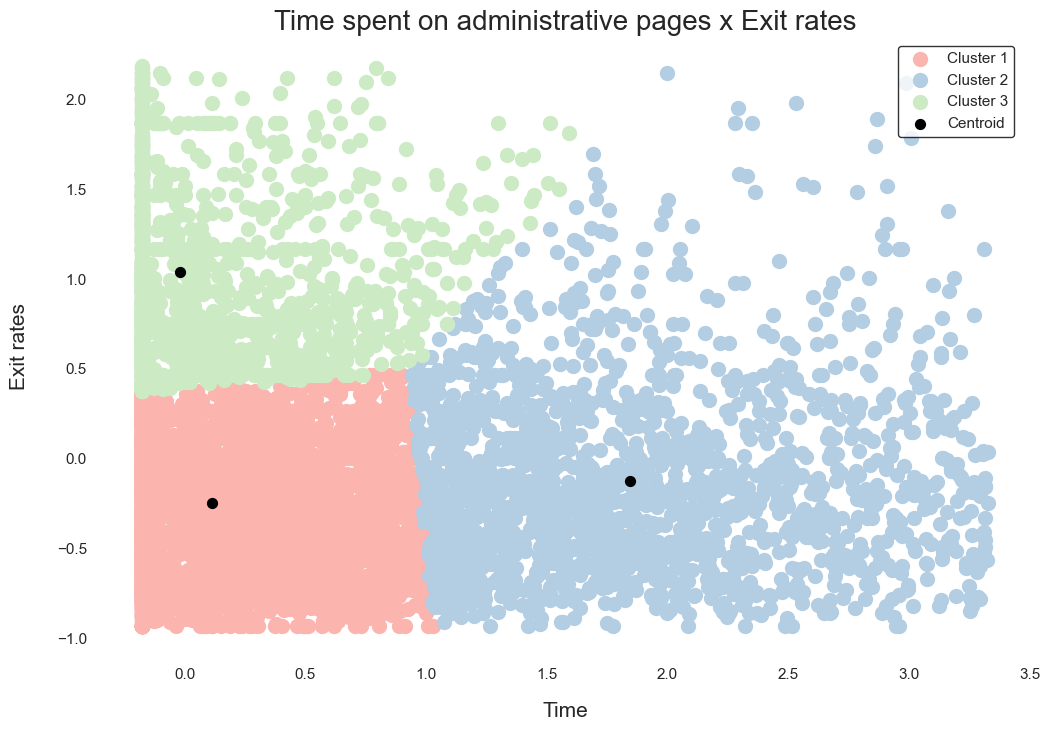

In [349]:
# K-means++ clustering 
optimal_clusters = 3  
km1 = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42, tol=0.001)
y_means = km1.fit_predict(var_scaled)

# Plotting the clusters
pastel1 = plt.colormaps['Pastel1']

plt.figure(figsize=(12, 8))

plt.scatter(var_scaled[y_means == 0, 0], var_scaled[y_means == 0, 1], s=100, color=pastel1(0), label='Cluster 1')
plt.scatter(var_scaled[y_means == 1, 0], var_scaled[y_means == 1, 1], s=100, color=pastel1(1), label='Cluster 2')
plt.scatter(var_scaled[y_means == 2, 0], var_scaled[y_means == 2, 1], s=100, color=pastel1(2), label='Cluster 3')
plt.scatter(km1.cluster_centers_[:, 0], km1.cluster_centers_[:, 1], s=50, color='black', label='Centroid')

plt.title('Time spent on administrative pages x Exit rates', fontsize=20)
plt.grid()
plt.xlabel('Time', fontsize=15, labelpad=15)
plt.ylabel('Exit rates', fontsize=15, labelpad=20)

legend = plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', edgecolor='black', facecolor='white', frameon=True)
plt.setp(legend.get_frame(), linewidth=1) 
plt.grid(False)
sns.despine(bottom=True, left=True)
plt.show()

Based on the Elbow method, the optimal number of clusters is 3. Despite a Silhouette score 0.0112 higher for the 2-cluster variant, I find that user behavior can be better shown with 3 clusters.

**Cluster 1** consists of users with a low exit rate and minimal time spent on administrative pages. These might be general customers. 

**Cluster 2** includes users who spend a high amount of time on administrative pages and also exhibit a low exit rate. These individuals may be new or targeted customers seeking detailed information.

**Cluster 3** comprises users who spend minimal time on administrative pages and have a high exit rate. This group might consist of disinterested visitors browsing the site without specific intentions.

#### INFORMATIONAL_DURATION x EXITRATES

In [354]:
# getting the variables
data2 = data_copy.iloc[:, [3, 7]].values

In [355]:
# standardizing
scaler=RobustScaler()
var_scaled2=scaler.fit_transform(data2)

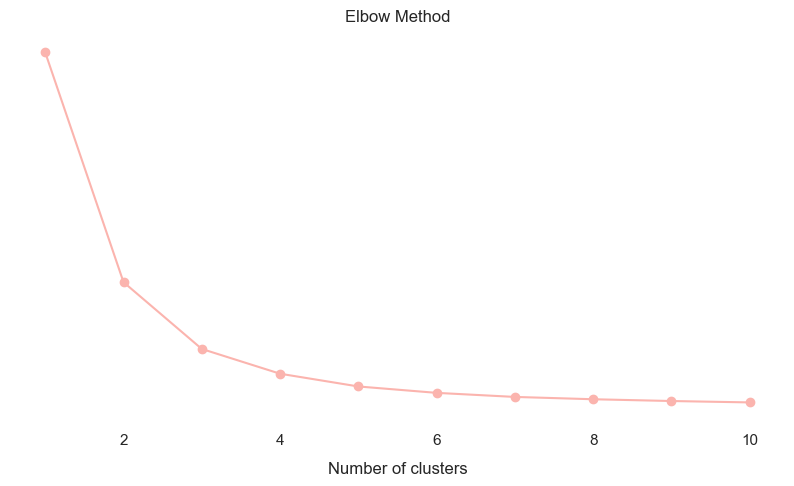

Number of clusters: 2, Silhouette Score: 0.9468
Number of clusters: 3, Silhouette Score: 0.9266
Number of clusters: 4, Silhouette Score: 0.9137
Number of clusters: 5, Silhouette Score: 0.9068
Number of clusters: 6, Silhouette Score: 0.9016
Number of clusters: 7, Silhouette Score: 0.9017
Number of clusters: 8, Silhouette Score: 0.8949
Number of clusters: 9, Silhouette Score: 0.8954
Number of clusters: 10, Silhouette Score: 0.8958


In [361]:
from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

# Elbow method
wcss = []
for i in range(1, 11):
    km2 = KMeans(n_clusters=i,
               init='k-means++',
               max_iter=300,
               n_init=10, 
               random_state=42,
               tol=0.001)
    km2.fit(var_scaled2)
    wcss.append(km2.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method', pad=10)
plt.xlabel('Number of clusters', labelpad=10)
plt.ylabel('')
plt.yticks([])
sns.despine(bottom=True, left=True)
plt.show()

# Silhouette Scores for clusters
silhouette_scores = {}

for n_clusters in range(2, 11):
    km2 = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42, tol=0.001)
    cluster_labels = km2.fit_predict(var_scaled2)
    silhouette_avg = silhouette_score(var_scaled2, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg


for n_clusters, score in silhouette_scores.items():
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score:.4f}')


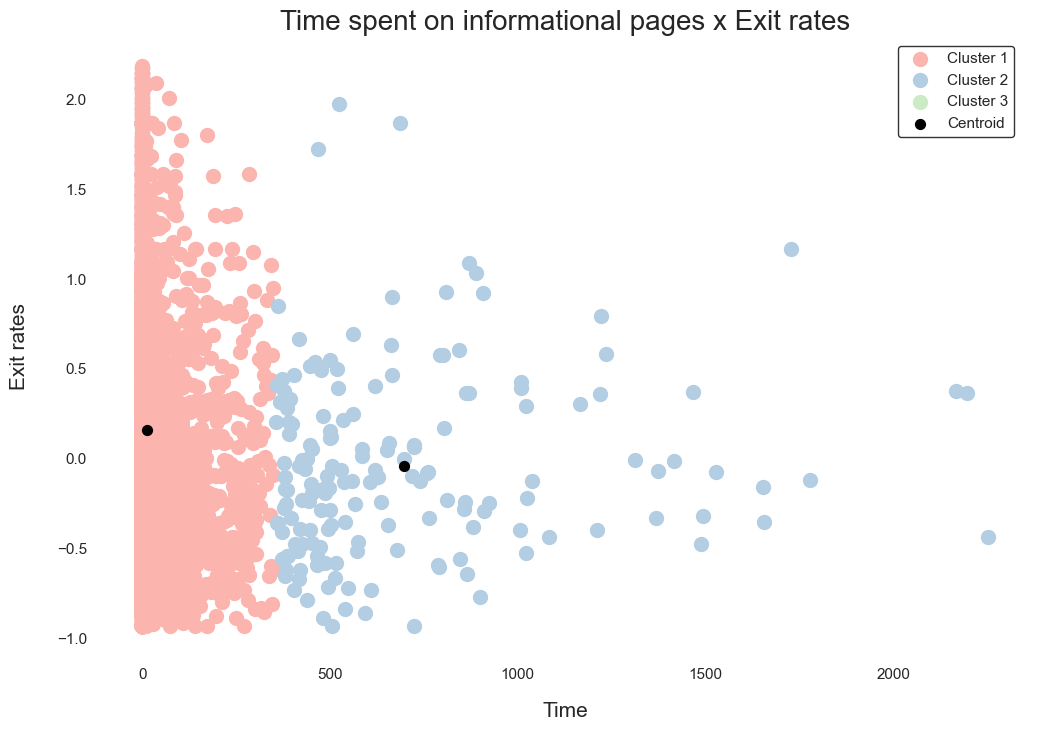

In [362]:
# K-means++ clustering 
optimal_clusters = 2 
km2 = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42, tol=0.001)
y_means = km2.fit_predict(var_scaled2)

# Plotting the clusters
pastel1 = plt.colormaps['Pastel1']

plt.figure(figsize=(12, 8))

plt.scatter(var_scaled2[y_means == 0, 0], var_scaled2[y_means == 0, 1], s=100, color=pastel1(0), label='Cluster 1')
plt.scatter(var_scaled2[y_means == 1, 0], var_scaled2[y_means == 1, 1], s=100, color=pastel1(1), label='Cluster 2')
plt.scatter(var_scaled2[y_means == 2, 0], var_scaled2[y_means == 2, 1], s=100, color=pastel1(2), label='Cluster 3')
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:, 1], s=50, color='black', label='Centroid')

plt.title('Time spent on informational pages x Exit rates', fontsize=20)
plt.grid()
plt.xlabel('Time', fontsize=15, labelpad=15)
plt.ylabel('Exit rates', fontsize=15, labelpad=20)

legend = plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', edgecolor='black', facecolor='white', frameon=True)
plt.setp(legend.get_frame(), linewidth=1) 
plt.grid(False)
sns.despine(bottom=True, left=True)
plt.show()

Based on the Elbow plot and Silhouette score, the optimal number of clusters is 2, with a high Silhouette score of 0.94 indicating dense and well-separated clusters. During the exploratory analysis, extreme values in the "Informational_Duration" variable were not removed to preserve data integrity, as eliminating them would have left no values. Standardization alone may not sufficiently mitigate their impact, potentially biasing the cluster analysis.

**Cluster 1** might comprise users who spend minimal or no time on informational pages, with varying exit rates. These users may include regular customers or disinterested visitors who do not find the information particularly relevant.

**Cluster 2** consists of users with lower exit rates who spend more time on pages, possibly indicating target customers seeking detailed information.

__However, due to the presence of numerous extreme values, this cluster analysis remains inconclusive.__

#### PRODUCTRELATED_DURATION x EXITRATES

In [350]:
# getting the variables
data3= data_copy.iloc[:, [5, 7]].values

In [351]:
# standardizing
scaler=RobustScaler()
var_scaled3=scaler.fit_transform(data3)

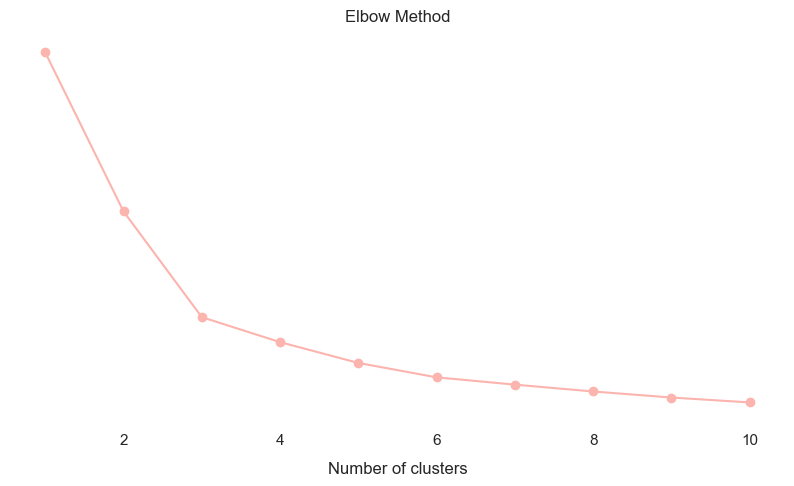

Number of clusters: 2, Silhouette Score: 0.4190
Number of clusters: 3, Silhouette Score: 0.4508
Number of clusters: 4, Silhouette Score: 0.4010
Number of clusters: 5, Silhouette Score: 0.3755
Number of clusters: 6, Silhouette Score: 0.3914
Number of clusters: 7, Silhouette Score: 0.3690
Number of clusters: 8, Silhouette Score: 0.3707
Number of clusters: 9, Silhouette Score: 0.3615
Number of clusters: 10, Silhouette Score: 0.3675


In [356]:

from sklearn.metrics import silhouette_score
import matplotlib.cm as cm

# Elbow method
wcss = []
for i in range(1, 11):
    km3 = KMeans(n_clusters=i,
               init='k-means++',
               max_iter=300,
               n_init=10, 
               random_state=42,
               tol=0.001)
    km3.fit(var_scaled3)
    wcss.append(km3.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method', pad=10)
plt.xlabel('Number of clusters', labelpad=10)
plt.ylabel('')
plt.yticks([])
sns.despine(bottom=True, left=True)
plt.show()

# Silhouette Scores for clusters
silhouette_scores = {}

for n_clusters in range(2, 11):
    km3 = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42, tol=0.001)
    cluster_labels = km3.fit_predict(var_scaled3)
    silhouette_avg = silhouette_score(var_scaled3, cluster_labels)
    silhouette_scores[n_clusters] = silhouette_avg


for n_clusters, score in silhouette_scores.items():
    print(f'Number of clusters: {n_clusters}, Silhouette Score: {score:.4f}')


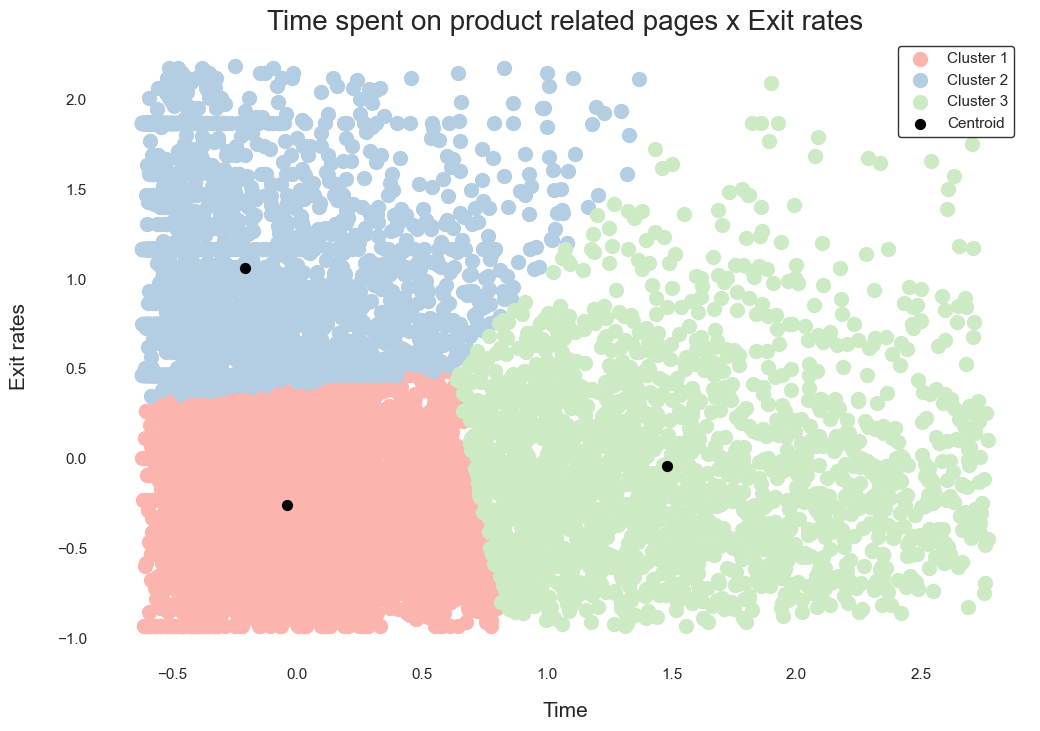

In [353]:
# K-means++ clustering 
optimal_clusters = 3  
km3 = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42, tol=0.001)
y_means = km3.fit_predict(var_scaled3)

# Plotting the clusters
pastel1 = plt.colormaps['Pastel1']

plt.figure(figsize=(12, 8))

plt.scatter(var_scaled3[y_means == 0, 0], var_scaled3[y_means == 0, 1], s=100, color=pastel1(0), label='Cluster 1')
plt.scatter(var_scaled3[y_means == 1, 0], var_scaled3[y_means == 1, 1], s=100, color=pastel1(1), label='Cluster 2')
plt.scatter(var_scaled3[y_means == 2, 0], var_scaled3[y_means == 2, 1], s=100, color=pastel1(2), label='Cluster 3')
plt.scatter(km3.cluster_centers_[:, 0], km3.cluster_centers_[:, 1], s=50, color='black', label='Centroid')

plt.title('Time spent on product related pages x Exit rates', fontsize=20)
plt.grid()
plt.xlabel('Time', fontsize=15, labelpad=15)
plt.ylabel('Exit rates', fontsize=15, labelpad=20)

legend = plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', edgecolor='black', facecolor='white', frameon=True)
plt.setp(legend.get_frame(), linewidth=1) 
plt.grid(False)
sns.despine(bottom=True, left=True)
plt.show()

Based on the "Elbow Method" and a Silhouette score of 0.43, the optimal number of clusters is 3.

**Cluster 1** includes users with a very low exit rate and minimal time spent on product related pages. These might be general or returning customers who are familiar with the site.

**Cluster 2** consists of users with a low exit rate and high amount of time spent on product related pages. These might be new or targeted customers seeking to thoroughly understand product features.

**Cluster 3** comprises users with a high exit rate and minimal time spent on these pages. These users may be less engaged or visit the site without a specific purpose.

##### References

1.Jain, Vipin, B. I. N. D. O. O. Malviya, and S. A. T. Y. E. N. D. R. A. Arya. "An overview of electronic commerce (e-Commerce)." Journal of Contemporary Issues in Business and Government 27, no. 3 (2021): 665-670.

2.Rahayu, Rita, and John Day. "E-commerce adoption by SMEs in developing countries: evidence from Indonesia." Eurasian Business Review 7 (2017): 25-41.

3.Schaupp, L. Christian, and France Bélanger. "A conjoint analysis of online consumer satisfaction1." Journal of electronic commerce research 6, no. 2 (2005): 95.

4.Vijayasarathy, Leo R. "Predicting consumer intentions to use on-line shopping: the case for an augmented technology acceptance model." Information & management 41, no. 6 (2004): 747-762.
